In [2]:
#Import the required libraries to perform the necessary operations
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

##  <font color='red'>Custering Ads Project

<font color='blue'>
The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000

CPC = Total Cost (spend) / Number of Clicks

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

Perform the following in given order:


Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.
Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Case Study to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing. 
 Check if there are any outliers.
 Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).
Perform z-score scaling and discuss how it affects the speed of the algorithm.
Perform clustering and do the following:
Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.
Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.
Print silhouette scores for up to 10 clusters and identify optimum number of clusters.
Profile the ads based on optimum number of clusters using silhouette score and your domain understanding
[Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]
Conclude the project by providing summary of your learnings.</font>

# Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [2]:
# Reading the data file
df=pd.read_excel("Clustering_Clean_Ads_Data.xlsx")
df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-18       Format1          300        250    75000  Inter223   
2       2020-9-3-16       Format6          336        250    84000  Inter217   
3        2020-9-3-2       Format1          300        250    75000  Inter224   
4       2020-9-3-13       Format1          300        250    75000  Inter225   
...             ...           ...          ...        ...      ...       ...   
25852   2020-10-1-5       Format5          720        300   216000  Inter222   
25853  2020-11-18-2       Format4          120        600    72000  inter230   
25854   2020-9-14-0       Format5          720        300   216000  Inter221   
25855   2020-9-30-4       Format7          300        600   180000  Inter228   
25856  2020-10-17-3       Format5          720        300   216000  Inter225   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          Web      Mobile  Display                   1979              384   
2          Web     Desktop    Video                   1566              298   
3          Web     Desktop  Display                    643              103   
4        Video      Mobile  Display                   1550              347   
...        ...         ...      ...                    ...              ...   
25852    Video     Desktop    Video                      1                1   
25853    Video      Mobile    Video                      7                1   
25854      App      Mobile    Video                      2                2   
25855    Video      Mobile  Display                      1                1   
25856    Video      Mobile  Display                      1                1   

       Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0              323       1   0.00  0.35   0.0000  0.0031  0.0  0.0  
1              380       0   0.00  0.35   0.0000  0.0000  0.0  NaN  
2              297       0   0.00  0.35   0.0000  0.0000  0.0  NaN  
3              102       0   0.00  0.35   0.0000  0.0000  0.0  NaN  
4              345       0   0.00  0.35   0.0000  0.0000  0.0  NaN  
...            ...     ...    ...   ...      ...     ...  ...  ...  
25852            1       0   0.01  0.35   0.0065     NaN  NaN  NaN  
25853            1       1   0.07  0.35   0.0455     NaN  NaN  NaN  
25854            2       1   0.09  0.35   0.0585     NaN  NaN  NaN  
25855            1       0   0.01  0.35   0.0065     NaN  NaN  NaN  
25856            1       0   0.01  0.35   0.0065     NaN  NaN  NaN  

[25857 rows x 19 columns]

In [3]:
#Read the top 5 records to look at what the data contains
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-18       Format1          300        250    75000  Inter223   
2  2020-9-3-16       Format6          336        250    84000  Inter217   
3   2020-9-3-2       Format1          300        250    75000  Inter224   
4  2020-9-3-13       Format1          300        250    75000  Inter225   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      Web      Mobile  Display                   1979              384   
2      Web     Desktop    Video                   1566              298   
3      Web     Desktop  Display                    643              103   
4    Video      Mobile  Display                   1550              347   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          380       0    0.0  0.35      0.0  0.0000  0.0  NaN  
2          297       0    0.0  0.35      0.0  0.0000  0.0  NaN  
3          102       0    0.0  0.35      0.0  0.0000  0.0  NaN  
4          345       0    0.0  0.35      0.0  0.0000  0.0  NaN

In [4]:
#Read the bottom 5 records to look at what the data contains
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
25852   2020-10-1-5       Format5          720        300   216000  Inter222   
25853  2020-11-18-2       Format4          120        600    72000  inter230   
25854   2020-9-14-0       Format5          720        300   216000  Inter221   
25855   2020-9-30-4       Format7          300        600   180000  Inter228   
25856  2020-10-17-3       Format5          720        300   216000  Inter225   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
25852    Video     Desktop    Video                      1                1   
25853    Video      Mobile    Video                      7                1   
25854      App      Mobile    Video                      2                2   
25855    Video      Mobile  Display                      1                1   
25856    Video      Mobile  Display                      1                1   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
25852            1       0   0.01  0.35   0.0065  NaN  NaN  NaN  
25853            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
25854            2       1   0.09  0.35   0.0585  NaN  NaN  NaN  
25855            1       0   0.01  0.35   0.0065  NaN  NaN  NaN  
25856            1       0   0.01  0.35   0.0065  NaN  NaN  NaN

In [5]:
#get the dimesnsions of the dataframe df
df.shape

(25857, 19)

In [6]:
#get the summary about the dataframe (columns, data type,etc..)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [7]:
#get the description about the columns (central tendency, quantile data, etc..)
df.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  25857.000000  25857.000000   25857.000000           2.585700e+04   
mean     390.431218    332.182774   99683.276482           2.169621e+06   
std      230.696051    194.260924   62640.685612           4.542680e+06   
min      120.000000     70.000000   33600.000000           0.000000e+00   
25%      120.000000    250.000000   72000.000000           9.133000e+03   
50%      300.000000    300.000000   75000.000000           3.309680e+05   
75%      720.000000    600.000000   84000.000000           2.208484e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.585700e+04  2.585700e+04   25857.000000  25857.000000   
mean      1.155322e+06  1.107525e+06    9525.881386   2414.473115   
std       2.407244e+06  2.326648e+06   16721.686071   3932.835240   
min       0.000000e+00  0.000000e+00       0.000000      0.000000   
25%       5.451000e+03  2.558000e+03     305.000000     36.030000   
50%       1.894490e+05  1.621620e+05    3457.000000   1173.660000   
75%       1.008171e+06  9.496930e+05   10681.000000   2692.280000   
max       1.470202e+07  1.419477e+07  143049.000000  26931.870000   

                Fee       Revenue           CTR           CPM           CPC  
count  25857.000000  25857.000000  19392.000000  19392.000000  18330.000000  
mean       0.336729   1716.548955      0.069627      7.252900      0.351061  
std        0.030540   2993.025498      0.074970      6.538314      0.343334  
min        0.210000      0.000000      0.000000      0.000000      0.000000  
25%        0.350000     23.420000      0.002400      1.630000      0.090000  
50%        0.350000    762.880000      0.007700      3.035000      0.160000  
75%        0.350000   1749.982000      0.128300     12.220000      0.570000  
max        0.350000  21276.180000      1.000000     81.560000      7.260000

In [8]:
#get the number of null values in a column/feature
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

In [9]:
#Get the number of unique values in a particular column
df.nunique()

Timestamp                 2018
InventoryType                7
Ad - Length                  6
Ad- Width                    5
Ad Size                      7
Ad Type                     14
Platform                     3
Device Type                  2
Format                       2
Available_Impressions    22104
Matched_Queries          20978
Impressions              20454
Clicks                   12753
Spend                    20467
Fee                          7
Revenue                  20578
CTR                       2067
CPM                       2086
CPC                        194
dtype: int64

In [10]:
#identifies any duplicate value in the dataframe
df.duplicated().sum()

0

In [11]:
#calculating the total spend
total_spend=df['Spend'].sum()
total_spend

62431031.330000006

## Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [12]:
#creating an user defined function to fill the missing values for CPC, CTR and CPM
def missing_values(row):
    if pd.isnull(row['CPC']):
        if row['Clicks'] != 0:  # Check for non-zero values
            row['CPC'] = row['Spend'] / row['Clicks']
        else:
            row['CPC'] = 0  # Set CPC to 0 if Clicks is 0

    if pd.isnull(row['CTR']):
        if row['Impressions'] != 0:  # Check for non-zero values
            row['CTR'] = (row['Clicks'] / row['Impressions']) * 100
        else:
            row['CTR'] = 0  # Set CTR to 0 if Impressions is 0

    if pd.isnull(row['CPM']):
        if row['Impressions'] != 0:  # Check for non-zero values
            row['CPM'] = row['Spend'] / (row['Impressions'] )* 1000
        else:
            row['CPM'] = 0  # Set CPM to 0 if Impressions is 0

    return row

# Apply the function to the DataFrame

In [13]:
#treat the missing values in CTR, CPC, CPM
df = df.apply(missing_values, axis=1)

In [14]:
#check the null values to make sure that the treatment of missing vlaues worked
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

# Part 1 - Clustering: Check if there are any outliers  Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. 

### <font color = 'green'> Univariate Analysis

Text(0.5, 1.0, 'Box Plot of Ad - Length')

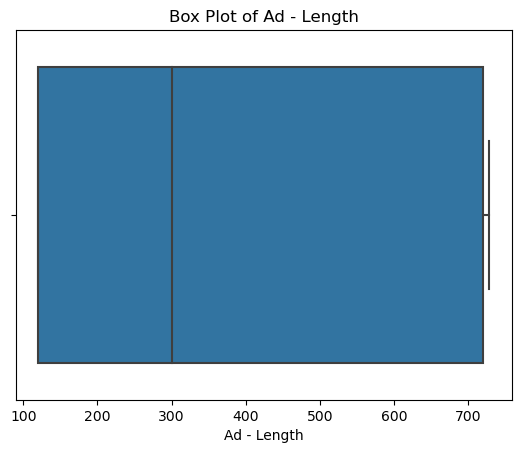

In [15]:
#creating a box plot to look for outliers
sns.boxplot(x=df["Ad - Length"])
plt.title('Box Plot of Ad - Length')

Text(0.5, 1.0, 'Box Plot of Ad - Width')

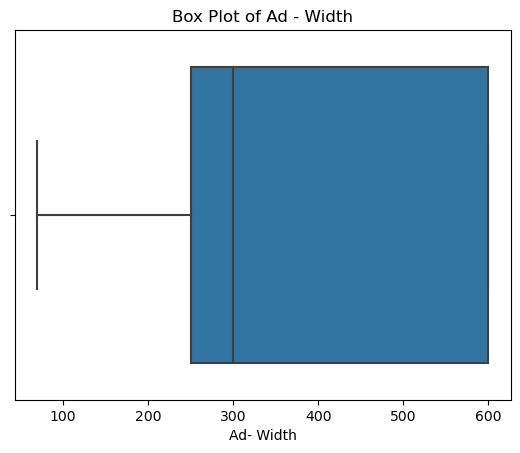

In [16]:
#creating a box plot to look for outliers
sns.boxplot(x=df["Ad- Width"])
plt.title('Box Plot of Ad - Width')

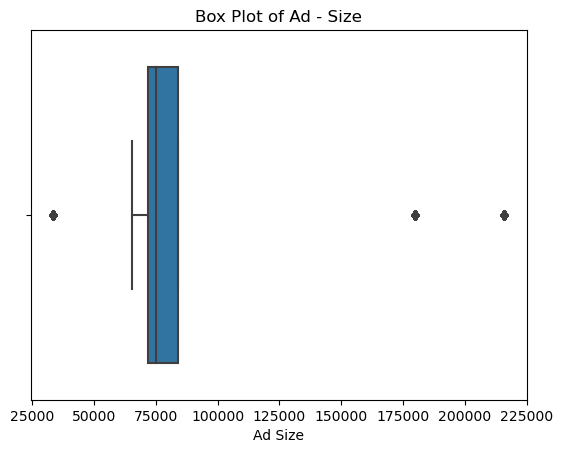

In [17]:
#creating a box plot to look for outliers
sns.boxplot(x=df["Ad Size"])
plt.title('Box Plot of Ad - Size');

<Axes: xlabel='Ad Size'>

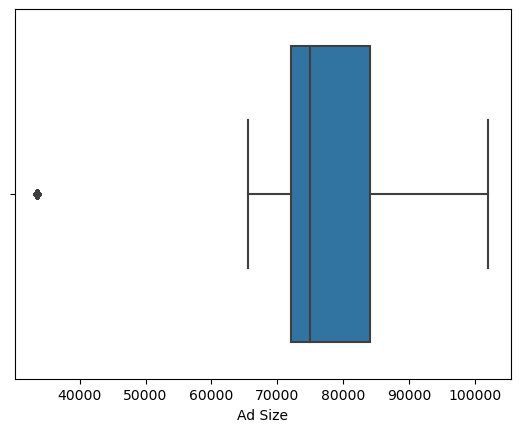

In [18]:
#Treat outliers for Ad size
Q1_AI=df['Ad Size'].quantile(0.25)
Q3_AI=df['Ad Size'].quantile(0.75)
IQR_AI=Q3_AI-Q1_AI
UW_AI=Q3_AI+1.5*IQR_AI
df.loc[df['Ad Size'] > UW_AI,'Ad Size']=UW_AI
sns.boxplot(data=df,x='Ad Size')

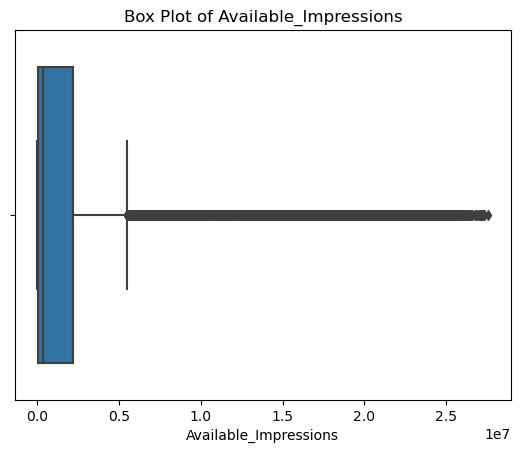

In [19]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='Available_Impressions')
plt.title('Box Plot of Available_Impressions');

Text(0.5, 1.0, 'Box Plot of Available_Impressions (After updating Outliers)')

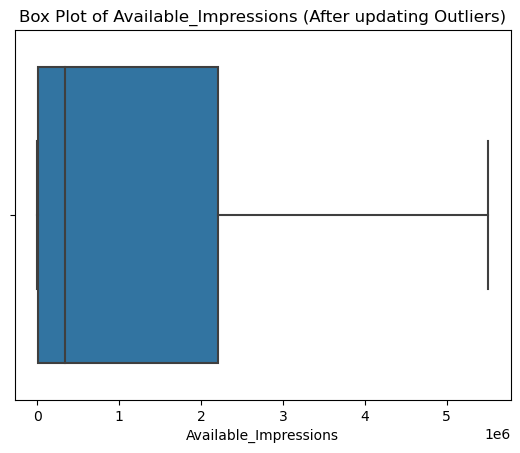

In [20]:
#Treat outliers for Available_Impressions
Q1_AI=df['Available_Impressions'].quantile(0.25)
Q3_AI=df['Available_Impressions'].quantile(0.75)
IQR_AI=Q3_AI-Q1_AI
UW_AI=Q3_AI+1.5*IQR_AI
df.loc[df['Available_Impressions'] > UW_AI,'Available_Impressions']=UW_AI
sns.boxplot(data=df,x='Available_Impressions')
plt.title('Box Plot of Available_Impressions (After updating Outliers)')

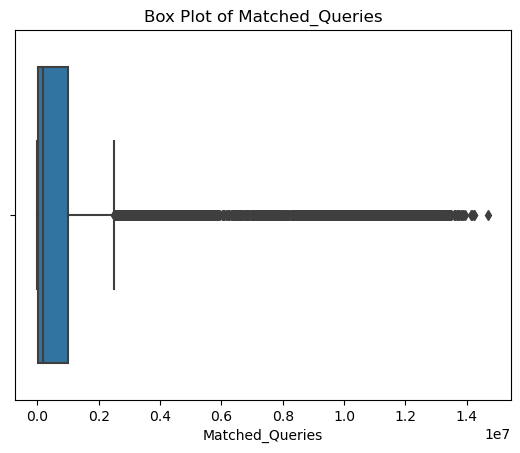

In [21]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='Matched_Queries')
plt.title('Box Plot of Matched_Queries');

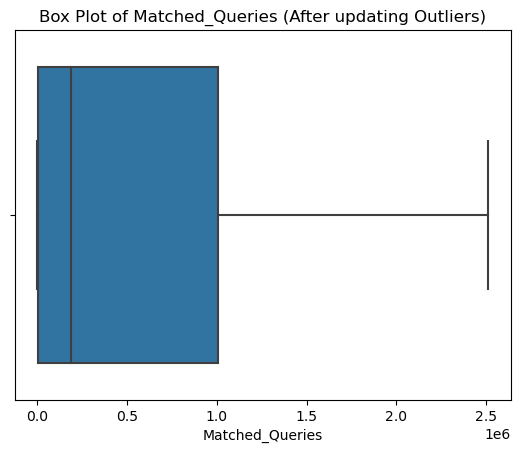

In [22]:
#Treat outliers for Matched_Queries
Q1_MQ=df['Matched_Queries'].quantile(0.25)
Q3_MQ=df['Matched_Queries'].quantile(0.75)
IQR_MQ=Q3_MQ-Q1_MQ
UW_MQ=Q3_MQ+1.5*IQR_MQ
df.loc[df['Matched_Queries'] > UW_MQ,'Matched_Queries']=UW_MQ
sns.boxplot(data=df,x='Matched_Queries')
plt.title('Box Plot of Matched_Queries (After updating Outliers)');

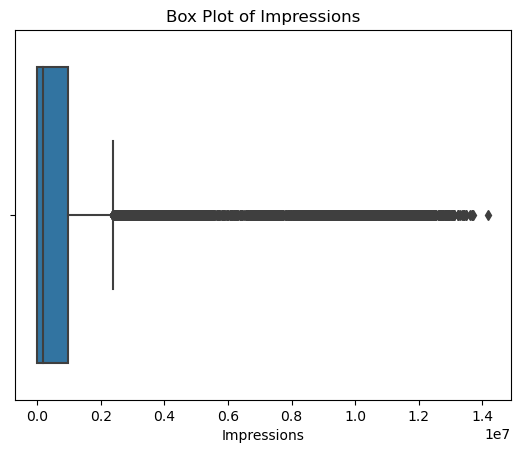

In [23]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='Impressions')
plt.title('Box Plot of Impressions');

In [24]:
#Treat outliers for Impressions
Q1_I=df['Impressions'].quantile(0.25)
Q3_I=df['Impressions'].quantile(0.75)
IQR_I=Q3_I-Q1_I
UW_I=Q3_I+1.5*IQR_I
df.loc[df['Impressions'] > UW_I,'Impressions']=UW_I

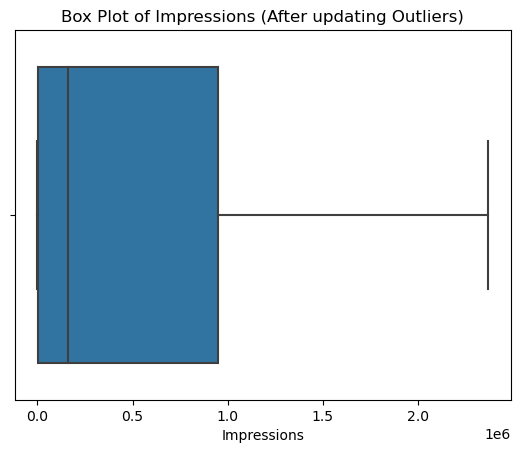

In [25]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='Impressions')
plt.title('Box Plot of Impressions (After updating Outliers)');

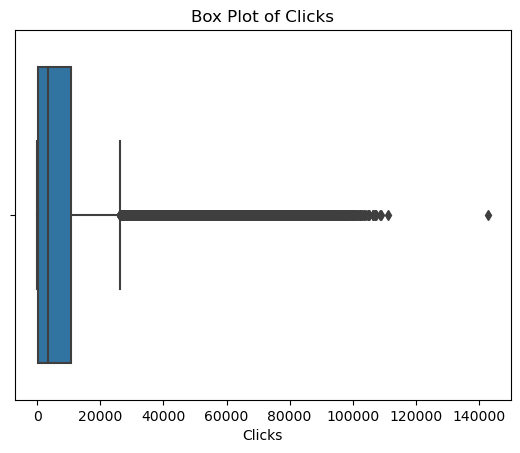

In [26]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='Clicks')
plt.title('Box Plot of Clicks');

In [27]:
#Treat outliers for Clicks
Q1_C=df['Clicks'].quantile(0.25)
Q3_C=df['Clicks'].quantile(0.75)
IQR_C=Q3_C-Q1_C
UW_C=Q3_C+1.5*IQR_C
df.loc[df['Clicks'] > UW_C,'Clicks']=UW_C

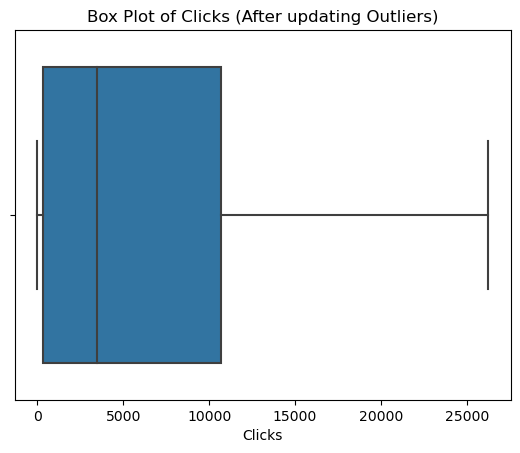

In [28]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='Clicks')
plt.title('Box Plot of Clicks (After updating Outliers)');

In [29]:
#Info about the Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  float64
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  float64
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

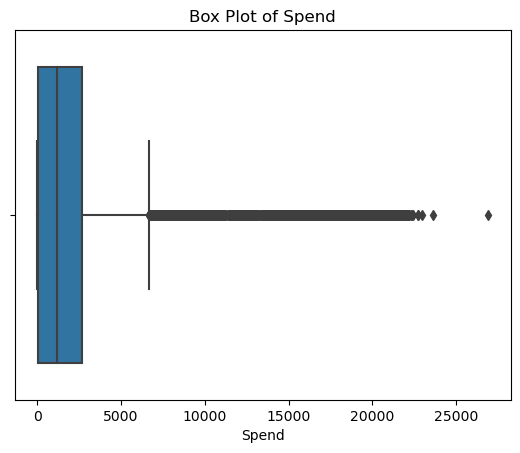

Max value of Spend is: 26931.87
Q3 value of Spend is: 2692.28
Number of outliers in 'Spend' column: 2459
Total Number of records in 'Spend' column: 25857
Number of outliers in 'Spend' column: 9.51%


In [30]:
# Create a box plot for the 'Spend' column using seaborn
sns.boxplot(x=df['Spend'])
plt.title('Box Plot of Spend')
plt.show()

# Calculate the upper and lower whiskers
Q1 = df['Spend'].quantile(0.25)
Q3 = df['Spend'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = df[(df['Spend'] < lower_whisker) | (df['Spend'] > upper_whisker)]['Spend'].count()
Total=df['Spend'].count()

percent_outliers_spend=((outliers_count/Total)*100).round(2)

print ("Max value of Spend is:",df["Spend"].max())
print ("Q3 value of Spend is:", Q3)
print(f"Number of outliers in 'Spend' column: {outliers_count}")
print(f"Total Number of records in 'Spend' column: {Total}")
print(f"Number of outliers in 'Spend' column: {percent_outliers_spend}%")

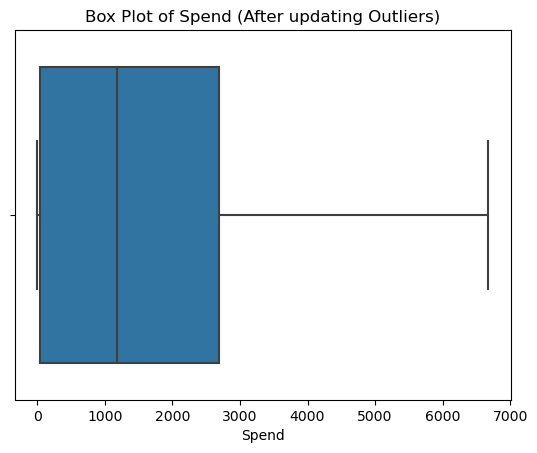

In [31]:
#Treating the outliers using the upper whisker
Q1 = df['Spend'].quantile(0.25)
Q3 = df['Spend'].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
df.loc[df['Spend'] > upper_whisker, 'Spend'] = upper_whisker

sns.boxplot(x=df['Spend'])
plt.title('Box Plot of Spend (After updating Outliers)')
plt.show()

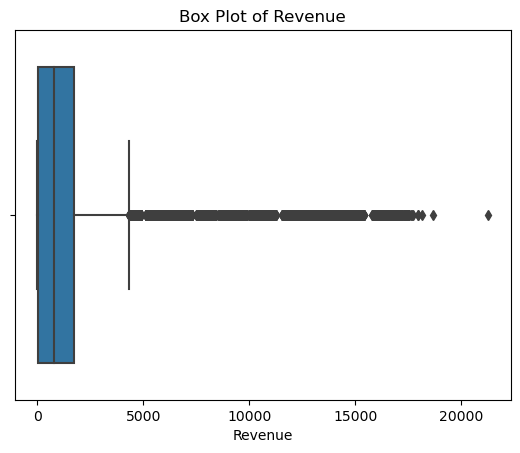

In [32]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='Revenue')
plt.title('Box Plot of Revenue');

In [33]:
#Identifying % of outliers in Revenue column
Q1_R=df['Revenue'].quantile(0.25)
Q3_R=df['Revenue'].quantile(0.75)
IQR=Q3_R-Q1_R

print("min value of Revenue is:",min(df["Revenue"]))
print("max value of Revenue is:",max(df["Revenue"]))
print("Q3 value is:",Q3_R)
print("IQR value is:", IQR)
UW_Revenue=Q3_R + 1.5*IQR
LW_Revenue=Q1_R-1.5*IQR
Total=df["Revenue"].count()
outlier_count_Rev=(df['Revenue']>UW_Revenue).sum()
print("UW_Revenue is:",UW_Revenue)
print("outlier_count_Rev count is:",outlier_count_Rev)
print("Total count is:", Total)
print("% outliers in Revenue is:",(outlier_count_Rev/Total)*100)
print(UW_Revenue,LW_Revenue)
print ()

min value of Revenue is: 0.0
max value of Revenue is: 21276.18
Q3 value is: 1749.9820000000002
IQR value is: 1726.5620000000001
UW_Revenue is: 4339.825000000001
outlier_count_Rev count is: 2626
Total count is: 25857
% outliers in Revenue is: 10.155857214680744
4339.825000000001 -2566.4230000000002



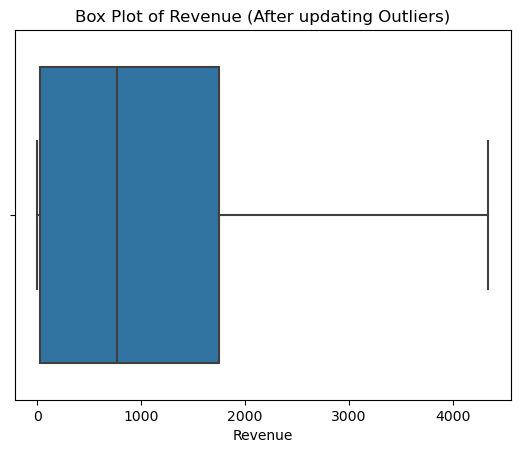

In [34]:
#Treat Outliers for Revenue Column
df.loc[df['Revenue'] > UW_Revenue,'Revenue']=UW_Revenue
sns.boxplot(data=df,x='Revenue')
plt.title('Box Plot of Revenue (After updating Outliers)')
plt.show()

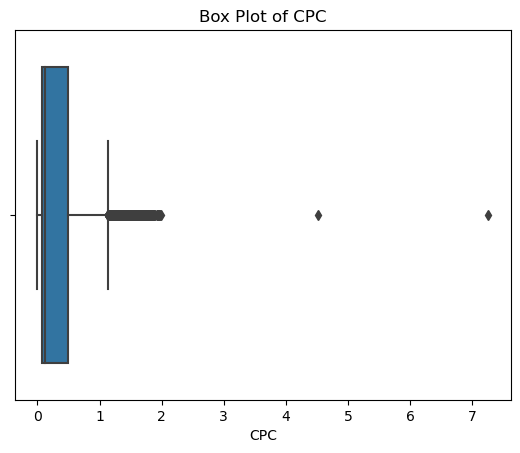

In [35]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='CPC')
plt.title('Box Plot of CPC');

In [36]:
#Treat Outliers for CPC
Q1_CPC=df['CPC'].quantile(0.25)
Q3_CPC=df['CPC'].quantile(0.75)
IQR_CPC=Q3_CPC - Q1_CPC
print (f"IQR value is:{IQR_CPC}")
UW_CPC = Q3_CPC + 1.5*IQR_CPC
LW_CPC = Q1_CPC - 1.5*IQR_CPC
df.loc[df["CPC"] > UW_CPC, "CPC"] = UW_CPC

IQR value is:0.42


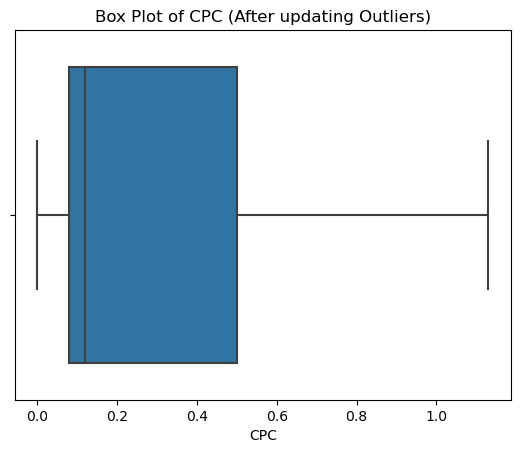

In [37]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='CPC')
plt.title('Box Plot of CPC (After updating Outliers)');

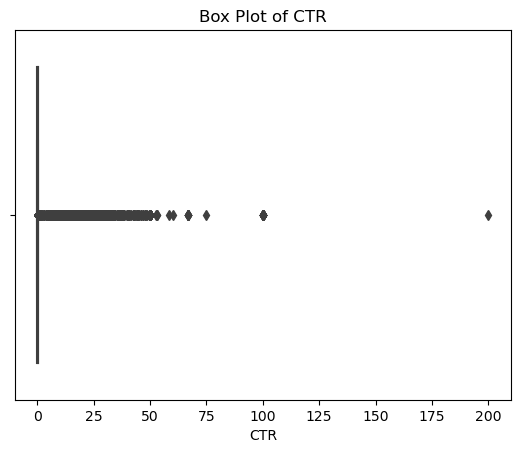

In [38]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='CTR')
plt.title('Box Plot of CTR');

In [39]:
#Treat Outliers for CTR
Q1_CTR=df['CTR'].quantile(0.25)
Q3_CTR=df['CTR'].quantile(0.75)
IQR_CTR=Q3_CTR - Q1_CTR
print (f"IQR value is:{IQR_CTR}")
UW_CTR = Q3_CTR + 1.5*IQR_CTR
LW_CTR = Q1_CTR - 1.5*IQR_CTR
df.loc[df["CTR"] > UW_CTR, "CTR"] = UW_CTR

IQR value is:0.1578


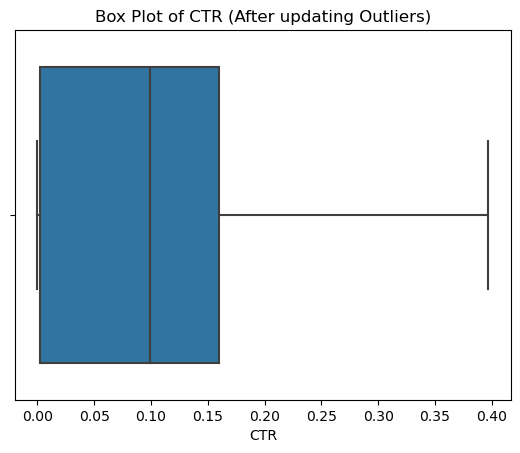

In [40]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='CTR')
plt.title('Box Plot of CTR (After updating Outliers)');

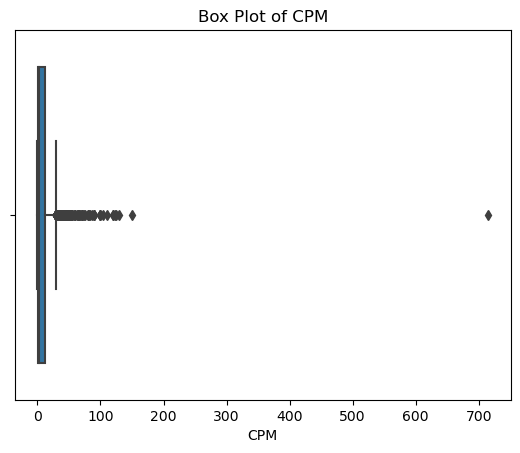

In [41]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='CPM')
plt.title('Box Plot of CPM');

In [42]:
#Treat Outliers for CPM
Q1_CPM=df['CPM'].quantile(0.25)
Q3_CPM=df['CPM'].quantile(0.75)
IQR_CPM=Q3_CPM - Q1_CPM
print (f"IQR value is:{IQR_CPM}")
UW_CPM = Q3_CPM + 1.5*IQR_CPM
df.loc[df["CPM"] > UW_CPM, "CPM"] = UW_CPM

IQR value is:10.879999999999999


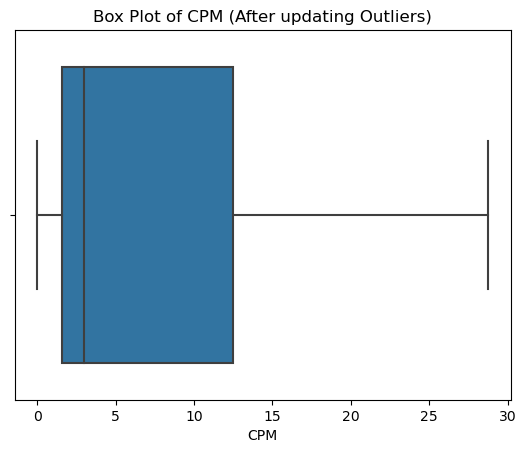

In [43]:
#creating a box plot to look for outliers
sns.boxplot(data=df,x='CPM')
plt.title('Box Plot of CPM (After updating Outliers)');

In [44]:
# Assuming df is your DataFrame
cust_df = df.iloc[:, [2, 3] + list(np.arange(9, 19))]

In [45]:
#Infoormation about the copied dataframe with only needed columns
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            25857 non-null  int64  
 1   Ad- Width              25857 non-null  int64  
 2   Available_Impressions  25857 non-null  float64
 3   Matched_Queries        25857 non-null  int64  
 4   Impressions            25857 non-null  float64
 5   Clicks                 25857 non-null  int64  
 6   Spend                  25857 non-null  float64
 7   Fee                    25857 non-null  float64
 8   Revenue                25857 non-null  float64
 9   CTR                    25857 non-null  float64
 10  CPM                    25857 non-null  float64
 11  CPC                    25857 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 2.4 MB


## Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [46]:
#scaling function
#X = StandardScaler()

In [48]:
#scaling the data using the standard scaler (Z scale function)
data_scaled = cust_df.apply(zscore)
#data_scaled = pd.DataFrame(StandardScaler().fit_transform(cust_df),columns=cust_df.columns)
data_scaled

Ad - Length  Ad- Width  Available_Impressions  Matched_Queries  \
0        -0.392000  -0.423062              -0.714953        -0.744816   
1        -0.392000  -0.423062              -0.714862        -0.744749   
2        -0.235948  -0.423062              -0.715079        -0.744846   
3        -0.392000  -0.423062              -0.715566        -0.745066   
4        -0.392000  -0.423062              -0.715088        -0.744791   
...            ...        ...                    ...              ...   
25852     1.428612  -0.165671              -0.715905        -0.745182   
25853    -1.172263   1.378674              -0.715901        -0.745182   
25854     1.428612  -0.165671              -0.715904        -0.745180   
25855    -0.392000   1.378674              -0.715905        -0.745182   
25856     1.428612  -0.165671              -0.715905        -0.745182   

       Impressions    Clicks     Spend       Fee   Revenue       CTR  \
0        -0.735050 -0.821889 -0.844382  0.434559 -0.841307 -0.844481   
1        -0.734983 -0.822006 -0.844382  0.434559 -0.841307 -0.867303   
2        -0.735081 -0.822006 -0.844382  0.434559 -0.841307 -0.867303   
3        -0.735313 -0.822006 -0.844382  0.434559 -0.841307 -0.867303   
4        -0.735024 -0.822006 -0.844382  0.434559 -0.841307 -0.867303   
...            ...       ...       ...       ...       ...       ...   
25852    -0.735432 -0.822006 -0.844377  0.434559 -0.841303 -0.867303   
25853    -0.735432 -0.821889 -0.844350  0.434559 -0.841276  2.054648   
25854    -0.735431 -0.821889 -0.844341  0.434559 -0.841267  2.054648   
25855    -0.735432 -0.822006 -0.844377  0.434559 -0.841303 -0.867303   
25856    -0.735432 -0.822006 -0.844377  0.434559 -0.841303 -0.867303   

            CPM       CPC  
0     -1.061370 -0.945141  
1     -1.061370 -0.945141  
2     -1.061370 -0.945141  
3     -1.061370 -0.945141  
4     -1.061370 -0.945141  
...         ...       ...  
25852  0.381478 -0.945141  
25853  3.089706 -0.718435  
25854  3.089706 -0.653662  
25855  0.381478 -0.945141  
25856  0.381478 -0.945141  

[25857 rows x 12 columns]

## Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

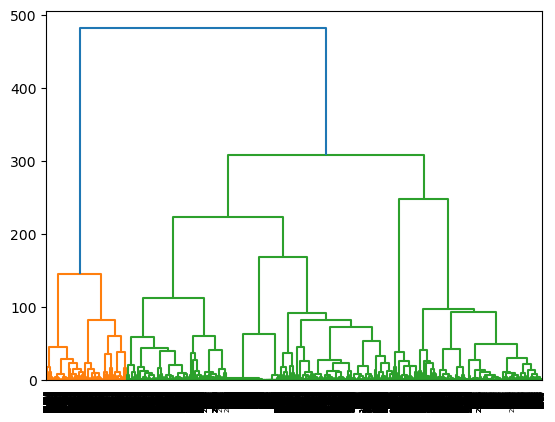

In [49]:
#Performing Hierarchical clustering by constructing a Dendrogram using WARD and Euclidean distance
wardlink=linkage(data_scaled,method='ward',metric='euclidean')
dend=dendrogram(wardlink)

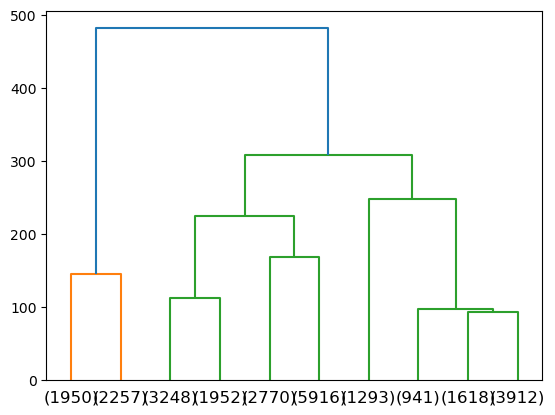

In [50]:
#creating a dendogram
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [51]:
path="C:/Users/ssraj/OneDrive/Data Science & Business Analytics/Data Mining/Residency3 - Clustering Project/clust_upd.xlsx"
df.to_excel(path,index='false')

## Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

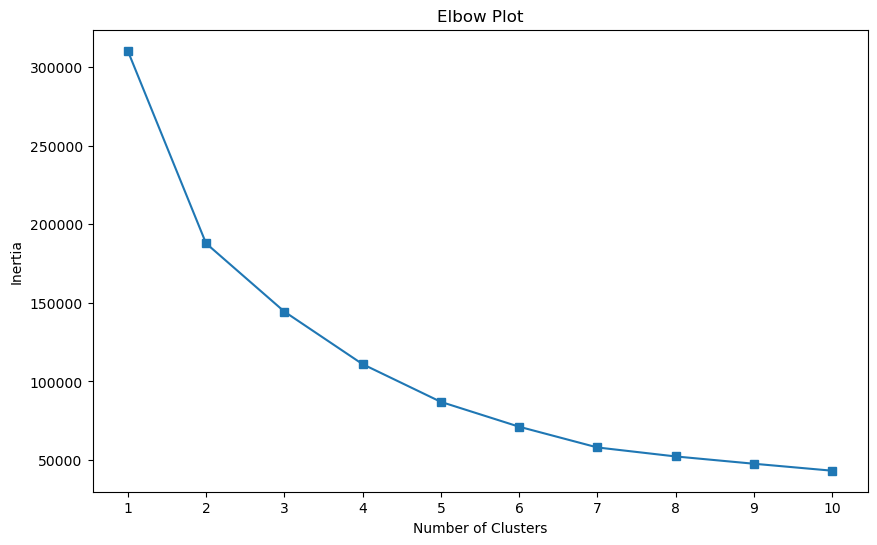

In [52]:
inertia = []
# Iterate through different numbers of clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=21)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    
# Creating an Elbow plot to identify optimum number of clusters for k-means algorithm
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='s')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show();

## Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [53]:
#Running the k-means algorithm to determine the WSS scores
for n_clusters in range (1,11):
    k_means = KMeans(n_clusters)
    k_means.fit(data_scaled)
    inertia=k_means.inertia_
    print('The WSS value for',n_clusters,'clusters is',inertia)

The WSS value for 1 clusters is 310283.9999999998
The WSS value for 2 clusters is 187796.170189926
The WSS value for 3 clusters is 144409.46598992287
The WSS value for 4 clusters is 111911.18610395497
The WSS value for 5 clusters is 86988.96388428584
The WSS value for 6 clusters is 71184.7897538018
The WSS value for 7 clusters is 58001.09439514846
The WSS value for 8 clusters is 52284.94044588447
The WSS value for 9 clusters is 47646.09035392647
The WSS value for 10 clusters is 43216.85894480684


In [54]:
#Calculating the silhouette scores for all the clusters
sil_scores=[]
for i in range(2,12):
    k_means = KMeans(n_clusters = i)
    k_means.fit(data_scaled)
    labels = k_means.labels_
    labels
    df["clus_sil"]=labels
    sil_score=silhouette_score(data_scaled,labels)
    sil_scores.append(sil_score)
    print("silhouette score for cluster",i-1,"is:",sil_score)

silhouette score for cluster 1 is: 0.4233957666086294
silhouette score for cluster 2 is: 0.34215465225999664
silhouette score for cluster 3 is: 0.37582927983966946
silhouette score for cluster 4 is: 0.41680700981755975
silhouette score for cluster 5 is: 0.424902353694161
silhouette score for cluster 6 is: 0.4389312857548664
silhouette score for cluster 7 is: 0.4361791840230419
silhouette score for cluster 8 is: 0.42871727447129004
silhouette score for cluster 9 is: 0.44611516236297405
silhouette score for cluster 10 is: 0.4487000112852917


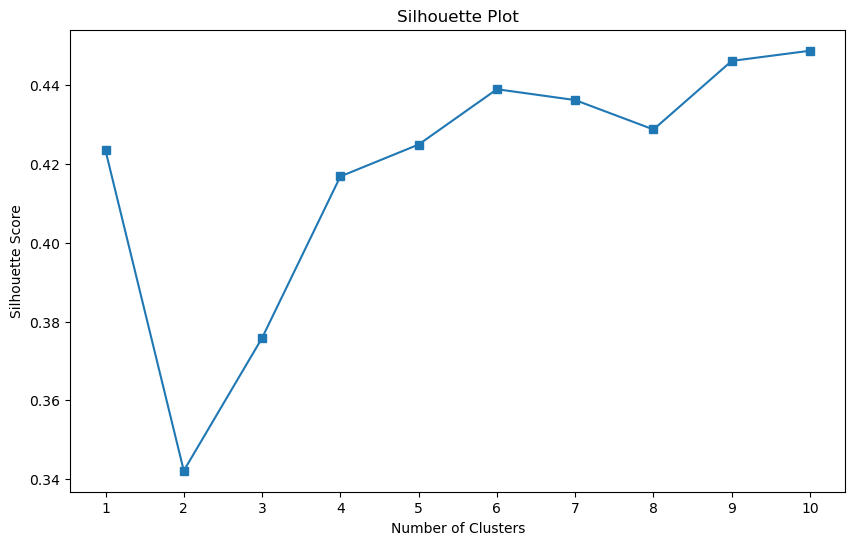

In [55]:
#plotting the silhouette scores
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sil_scores, marker='s')
plt.title('Silhouette Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(1, 11))
plt.show()

## Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding

In [56]:
#Calculating Silhouette width for all the records
sil_width = silhouette_samples(data_scaled,labels)
sil_width

array([ 0.75821135,  0.76253024,  0.75395845, ...,  0.2100216 ,
        0.37805719, -0.04048968])

In [57]:
#assigning the sil_width to the dataframe and displaying the top 5 rows
df["sil_width"] = sil_width
df.head(5)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-18       Format1          300        250    75000  Inter223   
2  2020-9-3-16       Format6          336        250    84000  Inter217   
3   2020-9-3-2       Format1          300        250    75000  Inter224   
4  2020-9-3-13       Format1          300        250    75000  Inter225   

  Platform Device Type   Format  Available_Impressions  ...  Impressions  \
0    Video     Desktop  Display                 1806.0  ...        323.0   
1      Web      Mobile  Display                 1979.0  ...        380.0   
2      Web     Desktop    Video                 1566.0  ...        297.0   
3      Web     Desktop  Display                  643.0  ...        102.0   
4    Video      Mobile  Display                 1550.0  ...        345.0   

   Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  clus_sil  sil_width  
0       1    0.0  0.35      0.0  0.0031  0.0  0.0         0   0.758211  
1       0    0.0  0.35      0.0  0.0000  0.0  0.0         0   0.762530  
2       0    0.0  0.35      0.0  0.0000  0.0  0.0         0   0.753958  
3       0    0.0  0.35      0.0  0.0000  0.0  0.0         0   0.762530  
4       0    0.0  0.35      0.0  0.0000  0.0  0.0         0   0.762553  

[5 rows x 21 columns]

In [58]:
#groupby to understand the split of the records clusterwise
samp=df.groupby("clus_sil")["clus_sil"].count()
samp

clus_sil
0     3025
1     2719
2     2051
3      766
4     1591
5     1255
6     2935
7     4847
8     2090
9     3626
10     952
Name: clus_sil, dtype: int64

In [59]:
#Understand the minimum silhouette score of the records < 0 indicates that some records are not properly aligned to right clusters
silhouette_samples(data_scaled,labels).min()

-0.12436499895647825

In [60]:
#Groupby the required features to get the mean data and explore
df.groupby(['clus_sil','Device Type'])['Clicks','Spend','Revenue','CPC','CTR','CPM'].mean().T

clus_sil            0                       1                         2   \
Device Type    Desktop     Mobile      Desktop       Mobile      Desktop   
Clicks       56.840376  45.982143  7342.817818  7320.183140  2702.704607   
Spend         6.696723   5.336898  4422.489820  4415.033340   273.449499   
Revenue       4.352862   3.468972  2997.776384  2992.280591   177.742176   
CPC           0.011268   0.009179     0.638280     0.635504     0.096039   
CTR           0.006071   0.005822     0.038179     0.035210     0.225314   
CPM           0.460188   0.516657     1.502553     1.506446    13.578029   

clus_sil                            3                           4   \
Device Type       Mobile       Desktop        Mobile       Desktop   
Clicks       2757.909368  19995.744604  20095.379098  17252.406082   
Spend         279.911767   2662.493309   2704.225205   6639.241082   
Revenue       181.942747   1760.283645   1788.341340   4326.122594   
CPC             0.093602      0.116886      0.116849      0.903502   
CTR             0.223253      0.166600      0.172582      0.029078   
CPM            13.402508     16.580901     16.466096      1.699669   

clus_sil                   ...            6                          7   \
Device Type        Mobile  ...       Desktop        Mobile      Desktop   
Clicks       16619.041667  ...  19495.078376  19363.352345  3408.754794   
Spend         6615.856560  ...   1741.740510   1757.232340  1504.564689   
Revenue       4315.089859  ...   1134.660514   1144.673284   978.474107   
CPC              0.916199  ...      0.086658      0.088001     0.531726   
CTR              0.029319  ...      0.165381      0.165682     0.004962   
CPM              1.728230  ...     10.858036     10.946123     1.857979   

clus_sil                          8                        9                \
Device Type       Mobile     Desktop      Mobile      Desktop       Mobile   
Clicks       3352.838452  929.818182  959.354694  1055.648292  1043.283148   
Spend        1489.680774   86.473102   96.266110   113.062089   115.991108   
Revenue       968.867935   56.207492   62.572922    73.490312    75.394185   
CPC             0.533605    0.085611    0.087342     0.110776     0.111741   
CTR             0.005020    0.371391    0.371153     0.127484     0.126837   
CPM             1.835293   16.310523   16.515095    12.573157    12.522460   

clus_sil              10               
Device Type      Desktop       Mobile  
Clicks       3031.473846  3117.448166  
Spend        1376.368738  1449.838660  
Revenue       895.634387   944.842659  
CPC             0.500232     0.518485  
CTR             0.340353     0.335767  
CPM             1.796848     1.820873  

[6 rows x 22 columns]

In [61]:
#running the K Means with the optimum cluster size 5
k_means = KMeans(n_clusters = 5)
k_means.fit(data_scaled)
labels = k_means.labels_
labels

array([2, 2, 2, ..., 4, 0, 4])

In [62]:
#assigning the cluster detail to each of the records
df["clus_sil"]=labels

In [63]:
#the mean silhouette score for the data is calculated below
silhouette_score(data_scaled,labels)

0.41680253753171154

In [64]:
#display the top 5 rows
df["sil_width"] = sil_width
df.head(5)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-18       Format1          300        250    75000  Inter223   
2  2020-9-3-16       Format6          336        250    84000  Inter217   
3   2020-9-3-2       Format1          300        250    75000  Inter224   
4  2020-9-3-13       Format1          300        250    75000  Inter225   

  Platform Device Type   Format  Available_Impressions  ...  Impressions  \
0    Video     Desktop  Display                 1806.0  ...        323.0   
1      Web      Mobile  Display                 1979.0  ...        380.0   
2      Web     Desktop    Video                 1566.0  ...        297.0   
3      Web     Desktop  Display                  643.0  ...        102.0   
4    Video      Mobile  Display                 1550.0  ...        345.0   

   Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  clus_sil  sil_width  
0       1    0.0  0.35      0.0  0.0031  0.0  0.0         2   0.758211  
1       0    0.0  0.35      0.0  0.0000  0.0  0.0         2   0.762530  
2       0    0.0  0.35      0.0  0.0000  0.0  0.0         2   0.753958  
3       0    0.0  0.35      0.0  0.0000  0.0  0.0         2   0.762530  
4       0    0.0  0.35      0.0  0.0000  0.0  0.0         2   0.762553  

[5 rows x 21 columns]

In [65]:
#groupby the clusters and get the count per each cluster
samp=df.groupby("clus_sil")["clus_sil"].count()
samp

clus_sil
0    6591
1    4329
2    8708
3    1549
4    4680
Name: clus_sil, dtype: int64

In [66]:
#Checking the % of records with sil_width < 0 compared to the total records
min_count=df.loc[df["sil_width"] < 0,"sil_width"].count()
min_count
total_count=df['sil_width'].count()
sil_per=((min_count/total_count)*100).round(2)
print ("Silhouette score < 0 count is:",min_count)
print("total count is: ", total_count)
print("% of records with sil_width score less than zero:",sil_per,'%')

Silhouette score < 0 count is: 475
total count is:  25857
% of records with sil_width score less than zero: 1.84 %


In [67]:
#Groupby the required features to get the mean data and explore
df.groupby(['clus_sil','Device Type'])['Clicks','Spend','Revenue','CPC','CTR','CPM'].mean().T

clus_sil               0                          1                \
Device Type      Desktop       Mobile       Desktop        Mobile   
Clicks       1947.221752  1884.960501  10843.346743  10761.788997   
Spend         205.081722   205.492221   5205.935156   5232.817450   
Revenue       133.303060   133.569868   3466.381654   3483.448129   
CPC             0.099054     0.099064      0.737613      0.744567   
CTR             0.210749     0.210194      0.035304      0.034072   
CPM            13.990720    13.959609      1.574226      1.592449   

clus_sil               2                          3                \
Device Type      Desktop       Mobile       Desktop        Mobile   
Clicks       2251.847932  2232.287564  26088.527629  26094.009109   
Spend         986.326275   986.455996   6022.057032   6017.203634   
Revenue       641.415816   641.625033   3981.437210   3971.537823   
CPC             0.352940     0.355898      0.112432      0.112252   
CTR             0.038060     0.039273      0.179308      0.177388   
CPM             1.410422     1.418958     15.506720     15.406766   

clus_sil                4                
Device Type       Desktop        Mobile  
Clicks       13719.609552  13526.893844  
Spend         1240.274358   1242.848918  
Revenue        807.853970    809.485814  
CPC              0.088453      0.089324  
CTR              0.192248      0.190993  
CPM             11.702768     11.782429

- Cluster 0: Ads with lowest spend and revenue with higher CTR and lower CPC
- Cluster 1: Ads with medium spend and revenue with lower CTR and highest CPC
- Cluster 2: Ads with lower spend and revenue and with higher CPC and lower CPM
- Cluster 3: Ads with highest spend and revenue and with higher CTR and CPM
- Cluster 4: Ads with medium spend and revenue and lowest CPC and higher CTR

### <font color = 'green'> Using the optimum cluster 5

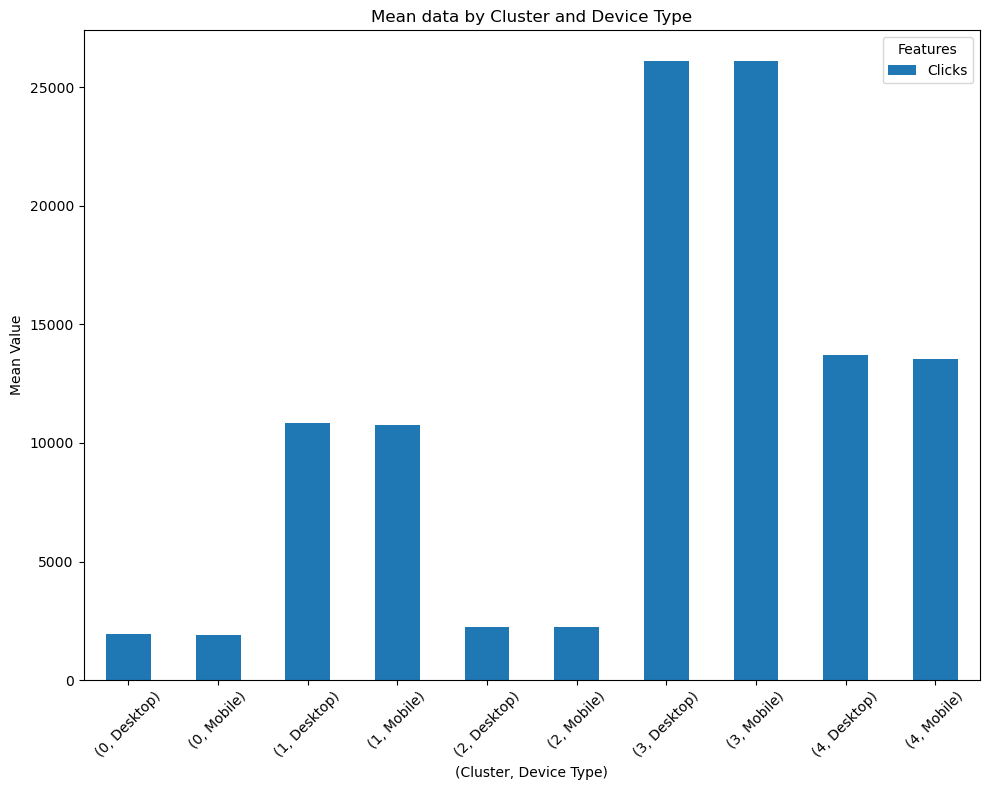

In [68]:
#Creating a bar plot for Clicks
grouped_data1 = df.groupby(['clus_sil', 'Device Type'])['Clicks'].mean()

# Create a bar plot
grouped_data1.plot(kind='bar', figsize=(10, 8))
plt.title('Mean data by Cluster and Device Type')
plt.xlabel('(Cluster, Device Type)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.tight_layout()

plt.show()

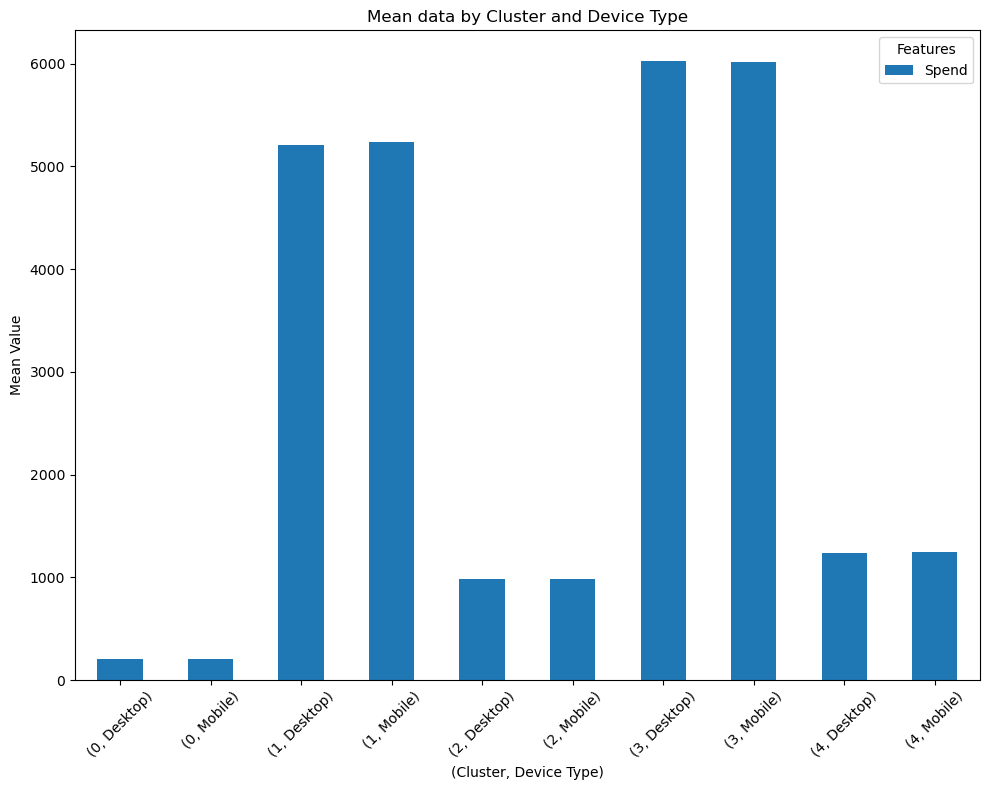

In [69]:
#Creating a bar plot for Spend
grouped_data1 = df.groupby(['clus_sil', 'Device Type'])['Spend'].mean()

# Create a bar plot
grouped_data1.plot(kind='bar', figsize=(10, 8))
plt.title('Mean data by Cluster and Device Type')
plt.xlabel('(Cluster, Device Type)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.tight_layout()

plt.show()

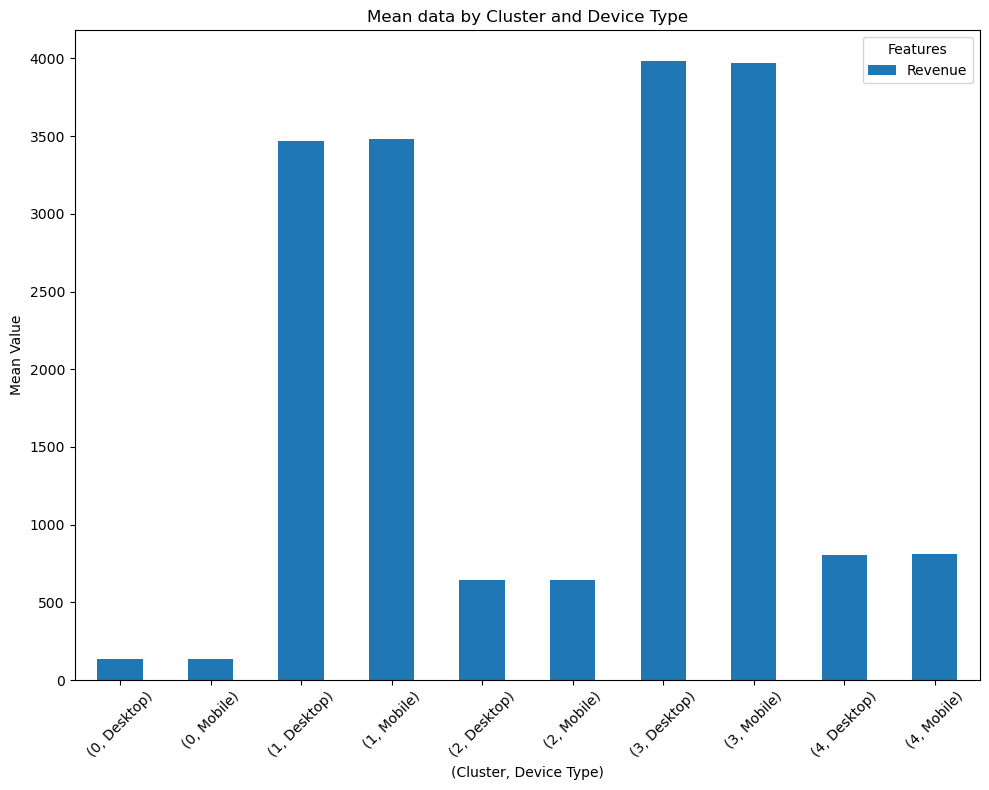

In [70]:
#Creating a bar plot for Revenue
grouped_data1 = df.groupby(['clus_sil', 'Device Type'])['Revenue'].mean()

# Create a bar plot
grouped_data1.plot(kind='bar', figsize=(10, 8))
plt.title('Mean data by Cluster and Device Type')
plt.xlabel('(Cluster, Device Type)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.tight_layout()

plt.show()

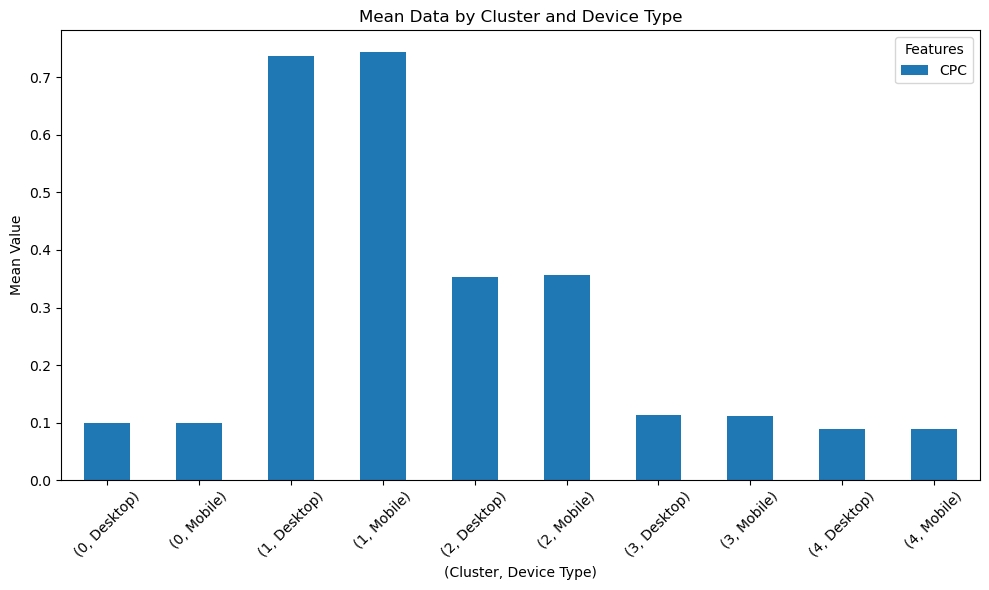

In [71]:
#Creating a bar plot for CPC, CTR and CPM
grouped_data2 = df.groupby(['clus_sil', 'Device Type'])['CPC'].mean()

# Create a bar plot
grouped_data2.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Data by Cluster and Device Type')
plt.xlabel('(Cluster, Device Type)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.tight_layout()

plt.show()

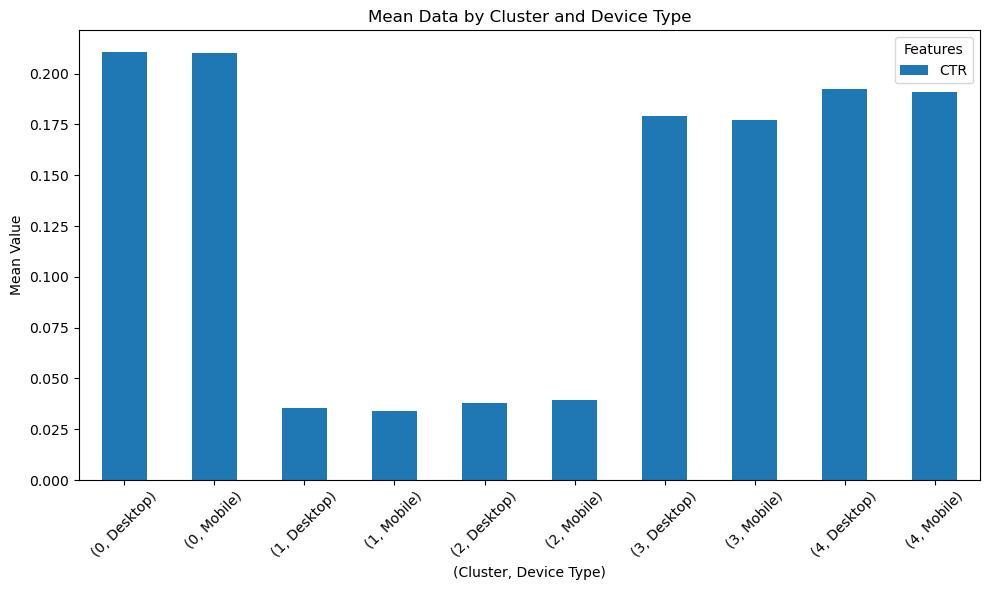

In [72]:
#Creating a bar plot for CTR
grouped_data2 = df.groupby(['clus_sil', 'Device Type'])['CTR'].mean()

# Create a bar plot
grouped_data2.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Data by Cluster and Device Type')
plt.xlabel('(Cluster, Device Type)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.tight_layout()

plt.show()

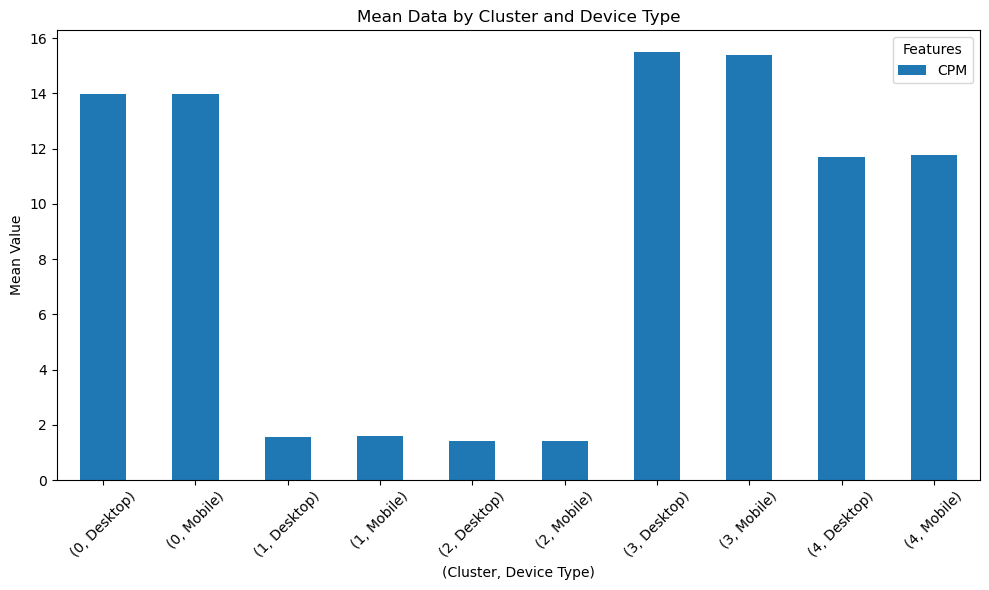

In [73]:
#Creating a bar plot for CPM
grouped_data2 = df.groupby(['clus_sil', 'Device Type'])['CPM'].mean()

# Create a bar plot
grouped_data2.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Data by Cluster and Device Type')
plt.xlabel('(Cluster, Device Type)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.tight_layout()

plt.show()

##  <font color='red'>PCA India Data Census

<font color='blue'>
Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.</font>

In [8]:
df=pd.read_excel('PCA+India+Data_Census.xlsx')
df

State Code  Dist.Code                     State                Area Name  \
0             1          1           Jammu & Kashmir                  Kupwara   
1             1          2           Jammu & Kashmir                   Badgam   
2             1          3           Jammu & Kashmir              Leh(Ladakh)   
3             1          4           Jammu & Kashmir                   Kargil   
4             1          5           Jammu & Kashmir                    Punch   
..          ...        ...                       ...                      ...   
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0     7707  23388  29796  5862  6196     3  ...           1150            749   
1     6218  19585  23102  4482  3733     7  ...            525            715   
2     4452   6546  10964  1082  1018     3  ...            114            188   
3     1320   2784   4206   563   677     0  ...            194            247   
4    11654  20591  29981  5157  4587    20  ...            874           1928   
..     ...    ...    ...   ...   ...   ...  ...            ...            ...   
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0              180            237            680            252   
1              123            229            186            148   
2               44             89              3             34   
3               61            128             13             50   
4              465           1043            205            302   
..             ...            ...            ...            ...   
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0               32             46         258         214  
1               76            178         140         160  
2                0              4          67          61  
3                4             10         116          59  
4               24            105         180         478  
..             ...            ...         ...         ...  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[640 rows x 61 columns]

In [9]:
df.shape

(640, 61)

In [10]:
df.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [12]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  310450.000000  485417.000000  750392.000000   

               M_06          F_06           M_SC           F_SC          M_ST  \
count    640.000000    640.000000     640.000000     640.000000    640.000000   
mean   12309.098438  11942.300000   13820.946875   20778.392188   6191.807813   
std    11500.906881  11326.294567   14426.373130   21727.887713   9912.668948   
min       56.000000     56.000000       0.000000       0.000000      0.000000   
25%     4733.750000   4672.250000    3466.250000    5603.250000    293.750000   
50%     9159.000000   8663.000000    9591.500000   13709.000000   2333.500000   
75%    16520.250000  15902.250000   19429.750000   29180.000000   7658.000000   
max    96223.000000  95129.000000  103307.000000  156429.000000  96785.000000   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    1392.973438    2757.050000     250.889062     558.098438   
std    ...    1489.707052    2788.776676     453.336594    1117.642748   
min    ...       4.000000      30.000000       0.000000       0.000000   
25%    ...     489.500000     957.250000      47.000000     109.000000   
50%    ...     949.000000    1928.000000     114.500000     247.500000   
75%    ...    1714.000000    3599.750000     270.750000     568.750000   
max    ...    9875.000000   21611.000000    5775.000000   17153.000000   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      560.690625    1293.431250      71.379688     200.742188   
std       762.578991    1585.377936     107.897627     309.740854   
min         0.000000       0.000000       0.000000       0.000000   
25%       136.500000     298.000000      14.000000      43.000000   
50%       308.000000     717.000000      35.000000     113.000000   
75%       642.000000    1710.750000      79.000000     240.000000   
max      6116.000000   13714.000000     895.000000    3354.000000   

        NON_WORK_M    NON_WORK_F  
count   640.000000    640.000000  
mean    510.014063    704.778125  
std     610.603187    910.209225  
min       0.000000      5.000000  
25%     161.000000    220.500000  
50%     326.000000    464.500000  
75%     604.500000    853.500000  
max    6456.000000  10533.000000  

[8 rows x 59 columns]

In [15]:
#Dropping columns that ren't suitable for PCA
d1=df.drop(['State Code','Dist.Code','State','Area Name'],axis=1)

In [16]:
d1.shape

(640, 57)

In [17]:
d1.corr()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC  \
No_HH           1.000000  0.916170  0.970590  0.797559  0.796373  0.775309   
TOT_M           0.916170  1.000000  0.982640  0.950825  0.947792  0.839925   
TOT_F           0.970590  0.982640  1.000000  0.907975  0.906557  0.816959   
M_06            0.797559  0.950825  0.907975  1.000000  0.998151  0.781120   
F_06            0.796373  0.947792  0.906557  0.998151  1.000000  0.773135   
M_SC            0.775309  0.839925  0.816959  0.781120  0.773135  1.000000   
F_SC            0.823847  0.826299  0.832756  0.747530  0.741686  0.985071   
M_ST            0.149627  0.091421  0.123626  0.055274  0.065138 -0.045666   
F_ST            0.165102  0.086180  0.128646  0.043948  0.054662 -0.047825   
M_LIT           0.931938  0.989312  0.985441  0.912757  0.907641  0.818484   
F_LIT           0.928087  0.931708  0.957012  0.832509  0.829128  0.713939   
M_ILL           0.763041  0.911539  0.858199  0.945409  0.948609  0.800775   
F_ILL           0.862074  0.885361  0.886917  0.863324  0.865289  0.832714   
TOT_WORK_M      0.938199  0.970417  0.968955  0.855773  0.852793  0.824773   
TOT_WORK_F      0.925259  0.807895  0.876233  0.683494  0.685348  0.712971   
MAINWORK_M      0.926629  0.932832  0.941016  0.789694  0.784789  0.778492   
MAINWORK_F      0.891306  0.744368  0.822822  0.584979  0.585683  0.644142   
MAIN_CL_M       0.431402  0.531734  0.487657  0.561164  0.561599  0.608157   
MAIN_CL_F       0.382680  0.355887  0.385373  0.381994  0.383296  0.360798   
MAIN_AL_M       0.673638  0.593420  0.623724  0.549857  0.554182  0.625566   
MAIN_AL_F       0.585856  0.379748  0.472748  0.296250  0.298385  0.408169   
MAIN_HH_M       0.641375  0.740354  0.700957  0.659762  0.657411  0.705651   
MAIN_HH_F       0.490908  0.443512  0.466299  0.354727  0.357130  0.392656   
MAIN_OT_M       0.843762  0.847851  0.860240  0.684290  0.677342  0.641383   
MAIN_OT_F       0.822356  0.745241  0.794134  0.557387  0.556283  0.574639   
MARGWORK_M      0.674375  0.806355  0.764404  0.851000  0.857190  0.746238   
MARGWORK_F      0.697947  0.701840  0.718952  0.715900  0.720255  0.654205   
MARG_CL_M       0.168756  0.301534  0.259766  0.418775  0.418054  0.301446   
MARG_CL_F       0.080604  0.151850  0.135768  0.239806  0.232540  0.154099   
MARG_AL_M       0.437106  0.542250  0.501570  0.639896  0.651923  0.562793   
MARG_AL_F       0.489158  0.446828  0.474702  0.487613  0.496610  0.463537   
MARG_HH_M       0.502224  0.666969  0.606260  0.696793  0.703793  0.669515   
MARG_HH_F       0.538261  0.579697  0.565228  0.542395  0.550840  0.570181   
MARG_OT_M       0.800971  0.892429  0.871874  0.835365  0.834838  0.747179   
MARG_OT_F       0.833235  0.839530  0.857518  0.744644  0.745304  0.685561   
MARGWORK_3_6_M  0.846809  0.974313  0.943051  0.988824  0.985903  0.809307   
MARGWORK_3_6_F  0.914147  0.983256  0.976391  0.936791  0.934017  0.798961   
MARG_CL_3_6_M   0.692377  0.819869  0.778856  0.859413  0.866289  0.751967   
MARG_CL_3_6_F   0.723436  0.715267  0.736418  0.716630  0.721351  0.662006   
MARG_AL_3_6_M   0.210641  0.352883  0.306733  0.472981  0.475943  0.344283   
MARG_AL_3_6_F   0.094437  0.165073  0.149338  0.253610  0.247161  0.161941   
MARG_HH_3_6_M   0.448382  0.546598  0.507514  0.641075  0.653328  0.565129   
MARG_HH_3_6_F   0.496975  0.436428  0.470992  0.466309  0.474994  0.451241   
MARG_OT_3_6_M   0.501329  0.664219  0.603306  0.690955  0.697567  0.663500   
MARG_OT_3_6_F   0.532138  0.569662  0.556009  0.527947  0.536047  0.555866   
MARGWORK_0_3_M  0.798661  0.890768  0.869805  0.834998  0.834619  0.740155   
MARGWORK_0_3_F  0.829153  0.842307  0.856203  0.742728  0.743463  0.689118   
MARG_CL_0_3_M   0.556941  0.698310  0.655347  0.760610  0.763614  0.673633   
MARG_CL_0_3_F   0.555543  0.595696  0.598951  0.646998  0.649834  0.569579   
MARG_AL_0_3_M   0.067425  0.167405  0.138763  0.266674  0.258670  0.184332   
MARG_AL_0_3_F   0.046128  0.115580  0.099

# Columns chosen:
* No_HH - No of household
* TOT_M - Total population male
* TOT_F - Total population female
* M_ILL - Illiterate male
* F_ILL - Illiterate Female

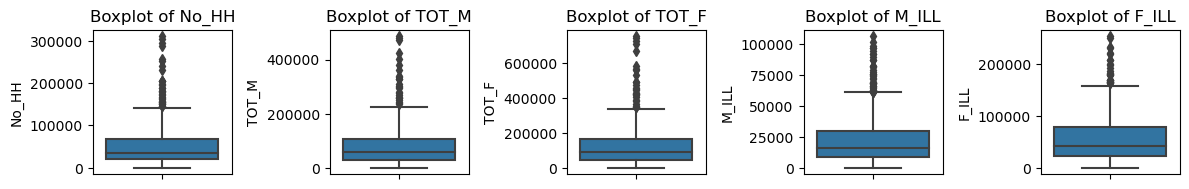

In [18]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,20))
chosen_Five_cols = ['No_HH','TOT_M','TOT_F','M_ILL','F_ILL']
for i in range(len(chosen_Five_cols)):
    plt.subplot(12, 5, i + 1)
    sns.boxplot(y = d1[chosen_Five_cols[i]], data = d1)
    plt.title('Boxplot of {}'.format(chosen_Five_cols[i]))
    plt.tight_layout()

In [19]:
from scipy.stats import zscore

In [20]:
data_scaled = d1.apply(zscore)
data_scaled

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0   -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1   -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2   -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3   -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4   -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   
..        ...       ...       ...       ...       ...       ...       ...   
635 -0.995677 -0.978990 -0.974268 -0.971387 -0.948916 -0.957326 -0.955667   
636 -0.844340 -0.921822 -0.886965 -0.936754 -0.919757 -0.803806 -0.765670   
637 -1.038465 -1.069066 -1.054885 -1.051356 -1.035331 -0.958783 -0.957049   
638 -0.986758 -1.019276 -1.007472 -1.008195 -0.996541 -0.958783 -0.957049   
639 -0.899166 -0.926854 -0.919050 -0.943193 -0.935220 -0.958783 -0.957049   

         M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0   -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1   -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2   -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3   -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4    0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   
..        ...       ...       ...  ...            ...            ...   
635 -0.625124 -0.640197 -0.913820  ...      -0.914299      -0.972530   
636 -0.625124 -0.640197 -0.853390  ...      -0.831668      -0.868461   
637 -0.522953 -0.529880 -1.016367  ...      -0.865930      -0.941309   
638 -0.622297 -0.637046 -0.962328  ...      -0.844432      -0.927673   
639 -0.608870 -0.623555 -0.856916  ...      -0.819576      -0.945616   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0        -0.156494      -0.287524       0.156577      -0.657412   
1        -0.282327      -0.294688      -0.491731      -0.723062   
2        -0.456727      -0.420050      -0.731894      -0.795026   
3        -0.419198      -0.385127      -0.718770      -0.784926   
4         0.472670       0.434200      -0.466796      -0.625849   
..             ...            ...            ...            ...   
635      -0.553861      -0.499744      -0.735831      -0.816489   
636      -0.547238      -0.487208      -0.685961      -0.734425   
637      -0.533992      -0.496162      -0.733206      -0.812701   
638      -0.500878      -0.460344      -0.721395      -0.803232   
639      -0.540615      -0.497953      -0.713521      -0.805757   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0        -0.365258      -0.499977   -0.413053   -0.539614  
1         0.042855      -0.073481   -0.606455   -0.598988  
2        -0.662068      -0.635680   -0.726103   -0.707839  
3        -0.624966      -0.616294   -0.645791   -0.710038  
4        -0.439461      -0.309346   -0.540895   -0.249344  
..             ...            ...         ...         ...  
635      -0.662068      -0.648604   -0.783468   -0.723232  
636      -0.624966      -0.574290   -0.655625   -0.587993  
637      -0.504388      -0.496746   -0.711352   -0.690247  
638      -0.652792      -0.635680   -0.672015   -0.661660  
639      -0.643517      -0.635680   -0.593343   -0.666058  

[640 rows x 57 columns]

In [21]:
data_scaled.describe().T

count          mean       std       min       25%       50%  \
No_HH           640.0  4.440892e-17  1.000782 -1.057697 -0.659882 -0.319887   
TOT_M           640.0 -8.881784e-17  1.000782 -1.084858 -0.677956 -0.294592   
TOT_F           640.0 -4.440892e-17  1.000782 -1.071906 -0.668250 -0.305233   
M_06            640.0 -5.551115e-17  1.000782 -1.066236 -0.659189 -0.274114   
F_06            640.0  6.661338e-17  1.000782 -1.050264 -0.642376 -0.289756   
M_SC            640.0  5.551115e-18  1.000782 -0.958783 -0.718323 -0.293404   
F_SC            640.0 -5.551115e-17  1.000782 -0.957049 -0.698964 -0.325615   
M_ST            640.0 -4.440892e-17  1.000782 -0.625124 -0.595467 -0.389534   
F_ST            640.0 -2.220446e-17  1.000782 -0.640197 -0.613122 -0.398476   
M_LIT           640.0 -4.440892e-17  1.000782 -1.032495 -0.656385 -0.273410   
F_LIT           640.0  0.000000e+00  1.000782 -0.880091 -0.605869 -0.300924   
M_ILL           640.0  3.885781e-17  1.000782 -1.103860 -0.675544 -0.313229   
F_ILL           640.0 -4.440892e-17  1.000782 -1.182788 -0.714648 -0.289434   
TOT_WORK_M      640.0 -4.440892e-17  1.000782 -1.041256 -0.666067 -0.276329   
TOT_WORK_F      640.0 -8.881784e-17  1.000782 -1.101591 -0.678035 -0.288114   
MAINWORK_M      640.0 -2.220446e-17  1.000782 -0.958137 -0.649073 -0.284647   
MAINWORK_F      640.0  4.440892e-17  1.000782 -0.932745 -0.623743 -0.324100   
MAIN_CL_M       640.0 -8.881784e-17  1.000782 -1.145474 -0.718165 -0.266889   
MAIN_CL_F       640.0 -1.110223e-17  1.000782 -1.030785 -0.669985 -0.296408   
MAIN_AL_M       640.0  0.000000e+00  1.000782 -0.914709 -0.747338 -0.299102   
MAIN_AL_F       640.0  4.440892e-17  1.000782 -0.694401 -0.584807 -0.388393   
MAIN_HH_M       640.0  1.665335e-17  1.000782 -0.691816 -0.545061 -0.301644   
MAIN_HH_F       640.0  0.000000e+00  1.000782 -0.434625 -0.356326 -0.264492   
MAIN_OT_M       640.0  0.000000e+00  1.000782 -0.691455 -0.539371 -0.324365   
MAIN_OT_F       640.0 -4.440892e-17  1.000782 -0.646347 -0.488651 -0.317847   
MARGWORK_M      640.0 -1.665335e-17  1.000782 -1.046990 -0.655025 -0.291825   
MARGWORK_F      640.0  2.220446e-17  1.000782 -1.181294 -0.698262 -0.265922   
MARG_CL_M       640.0  0.000000e+00  1.000782 -0.794140 -0.556257 -0.331347   
MARG_CL_F       640.0 -5.551115e-17  1.000782 -0.647891 -0.470946 -0.303687   
MARG_AL_M       640.0  1.110223e-17  1.000782 -0.874484 -0.643314 -0.328780   
MARG_AL_F       640.0  2.220446e-17  1.000782 -0.954894 -0.747687 -0.360900   
MARG_HH_M       640.0 -5.551115e-18  1.000782 -0.685144 -0.529942 -0.326070   
MARG_HH_F       640.0  1.110223e-17  1.000782 -0.656736 -0.513346 -0.298574   
MARG_OT_M       640.0  1.110223e-17  1.000782 -0.864853 -0.607407 -0.302269   
MARG_OT_F       640.0 -4.440892e-17  1.000782 -0.856115 -0.600094 -0.289356   
MARGWORK_3_6_M  640.0  7.216450e-17  1.000782 -1.067727 -0.659748 -0.298173   
MARGWORK_3_6_F  640.0 -2.220446e-17  1.000782 -0.973823 -0.656854 -0.292903   
MARG_CL_3_6_M   640.0 -2.220446e-17  1.000782 -1.058667 -0.668815 -0.293426   
MARG_CL_3_6_F   640.0 -8.881784e-17  1.000782 -1.212036 -0.707773 -0.241685   
MARG_AL_3_6_M   640.0 -4.440892e-17  1.000782 -0.872827 -0.612586 -0.341847   
MARG_AL_3_6_F   640.0  4.440892e-17  1.000782 -0.701351 -0.502020 -0.306297   
MARG_HH_3_6_M   640.0 -7.216450e-17  1.000782 -0.897436 -0.662335 -0.336627   
MARG_HH_3_6_F   640.0 -6.661338e-17  1.000782 -0.969686 -0.760784 -0.351845   
MARG_OT_3_6_M   640.0 -5.551115e-18  1.000782 -0.684513 -0.522705 -0.323234   
MARG_OT_3_6_F   640.0  3.330669e-17  1.000782 -0.651473 -0.509422 -0.295094   
MARGWORK_0_3_M  640.0  0.000000e+00  1.000782 -0.859800 -0.613309 -0.307996   
MARGWORK_0_3_F  640.0  0.000000e+00  1.000782 -0.848224 -0.601775 -0.300744   
MARG_CL_0_3_M   640.0 -2.775558e-17  1.000782 -0.933110 -0.606952 -0.298260   
MARG_CL_0_3_F   640.0 -5.551115e-17  1.000782 -0.978631 -0.645877 -0.297513   
MARG_AL_0_3_M   640.0  2.220446e-17  1.000782 -0.553861 -0.450104 

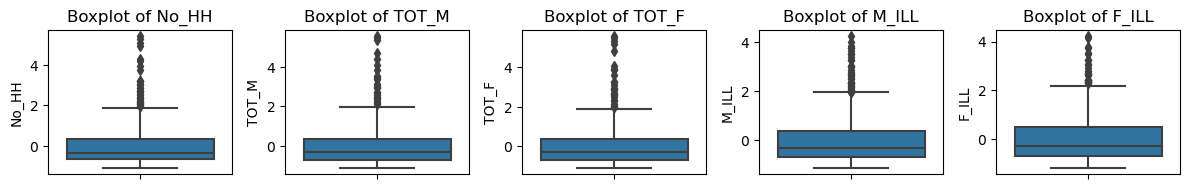

In [22]:
#Check for Impact of the Scaled Data
plt.figure(figsize = (12,20))
chosen_Five_cols = ['No_HH','TOT_M','TOT_F','M_ILL','F_ILL']
for i in range(len(chosen_Five_cols)):
    plt.subplot(12, 5, i + 1)
    sns.boxplot(y = data_scaled[chosen_Five_cols[i]], data = data_scaled)
    plt.title('Boxplot of {}'.format(chosen_Five_cols[i]))
    plt.tight_layout()

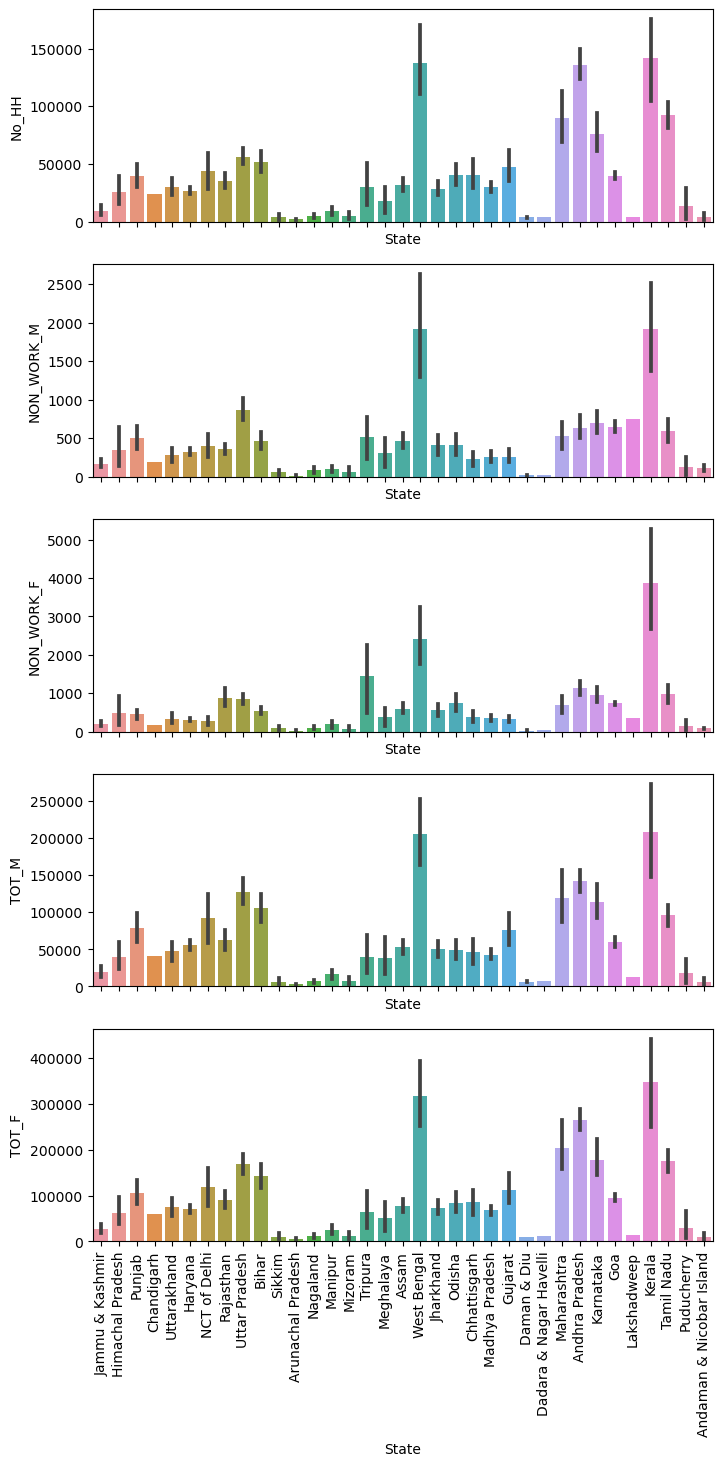

In [23]:
fig,axes=plt.subplots(5,1,sharex=True,figsize=(8, 16))
sns.barplot(x=df['State'],y=df['No_HH'],ax=axes[0])
sns.barplot(x=df['State'],y=df['NON_WORK_M'],ax=axes[1])
sns.barplot(x=df['State'],y=df['NON_WORK_F'],ax=axes[2])
sns.barplot(x=df['State'],y=df['TOT_M'],ax=axes[3])
sns.barplot(x=df['State'],y=df['TOT_F'],ax=axes[4])
plt.xticks(rotation=90)
plt.show()

<Axes: >

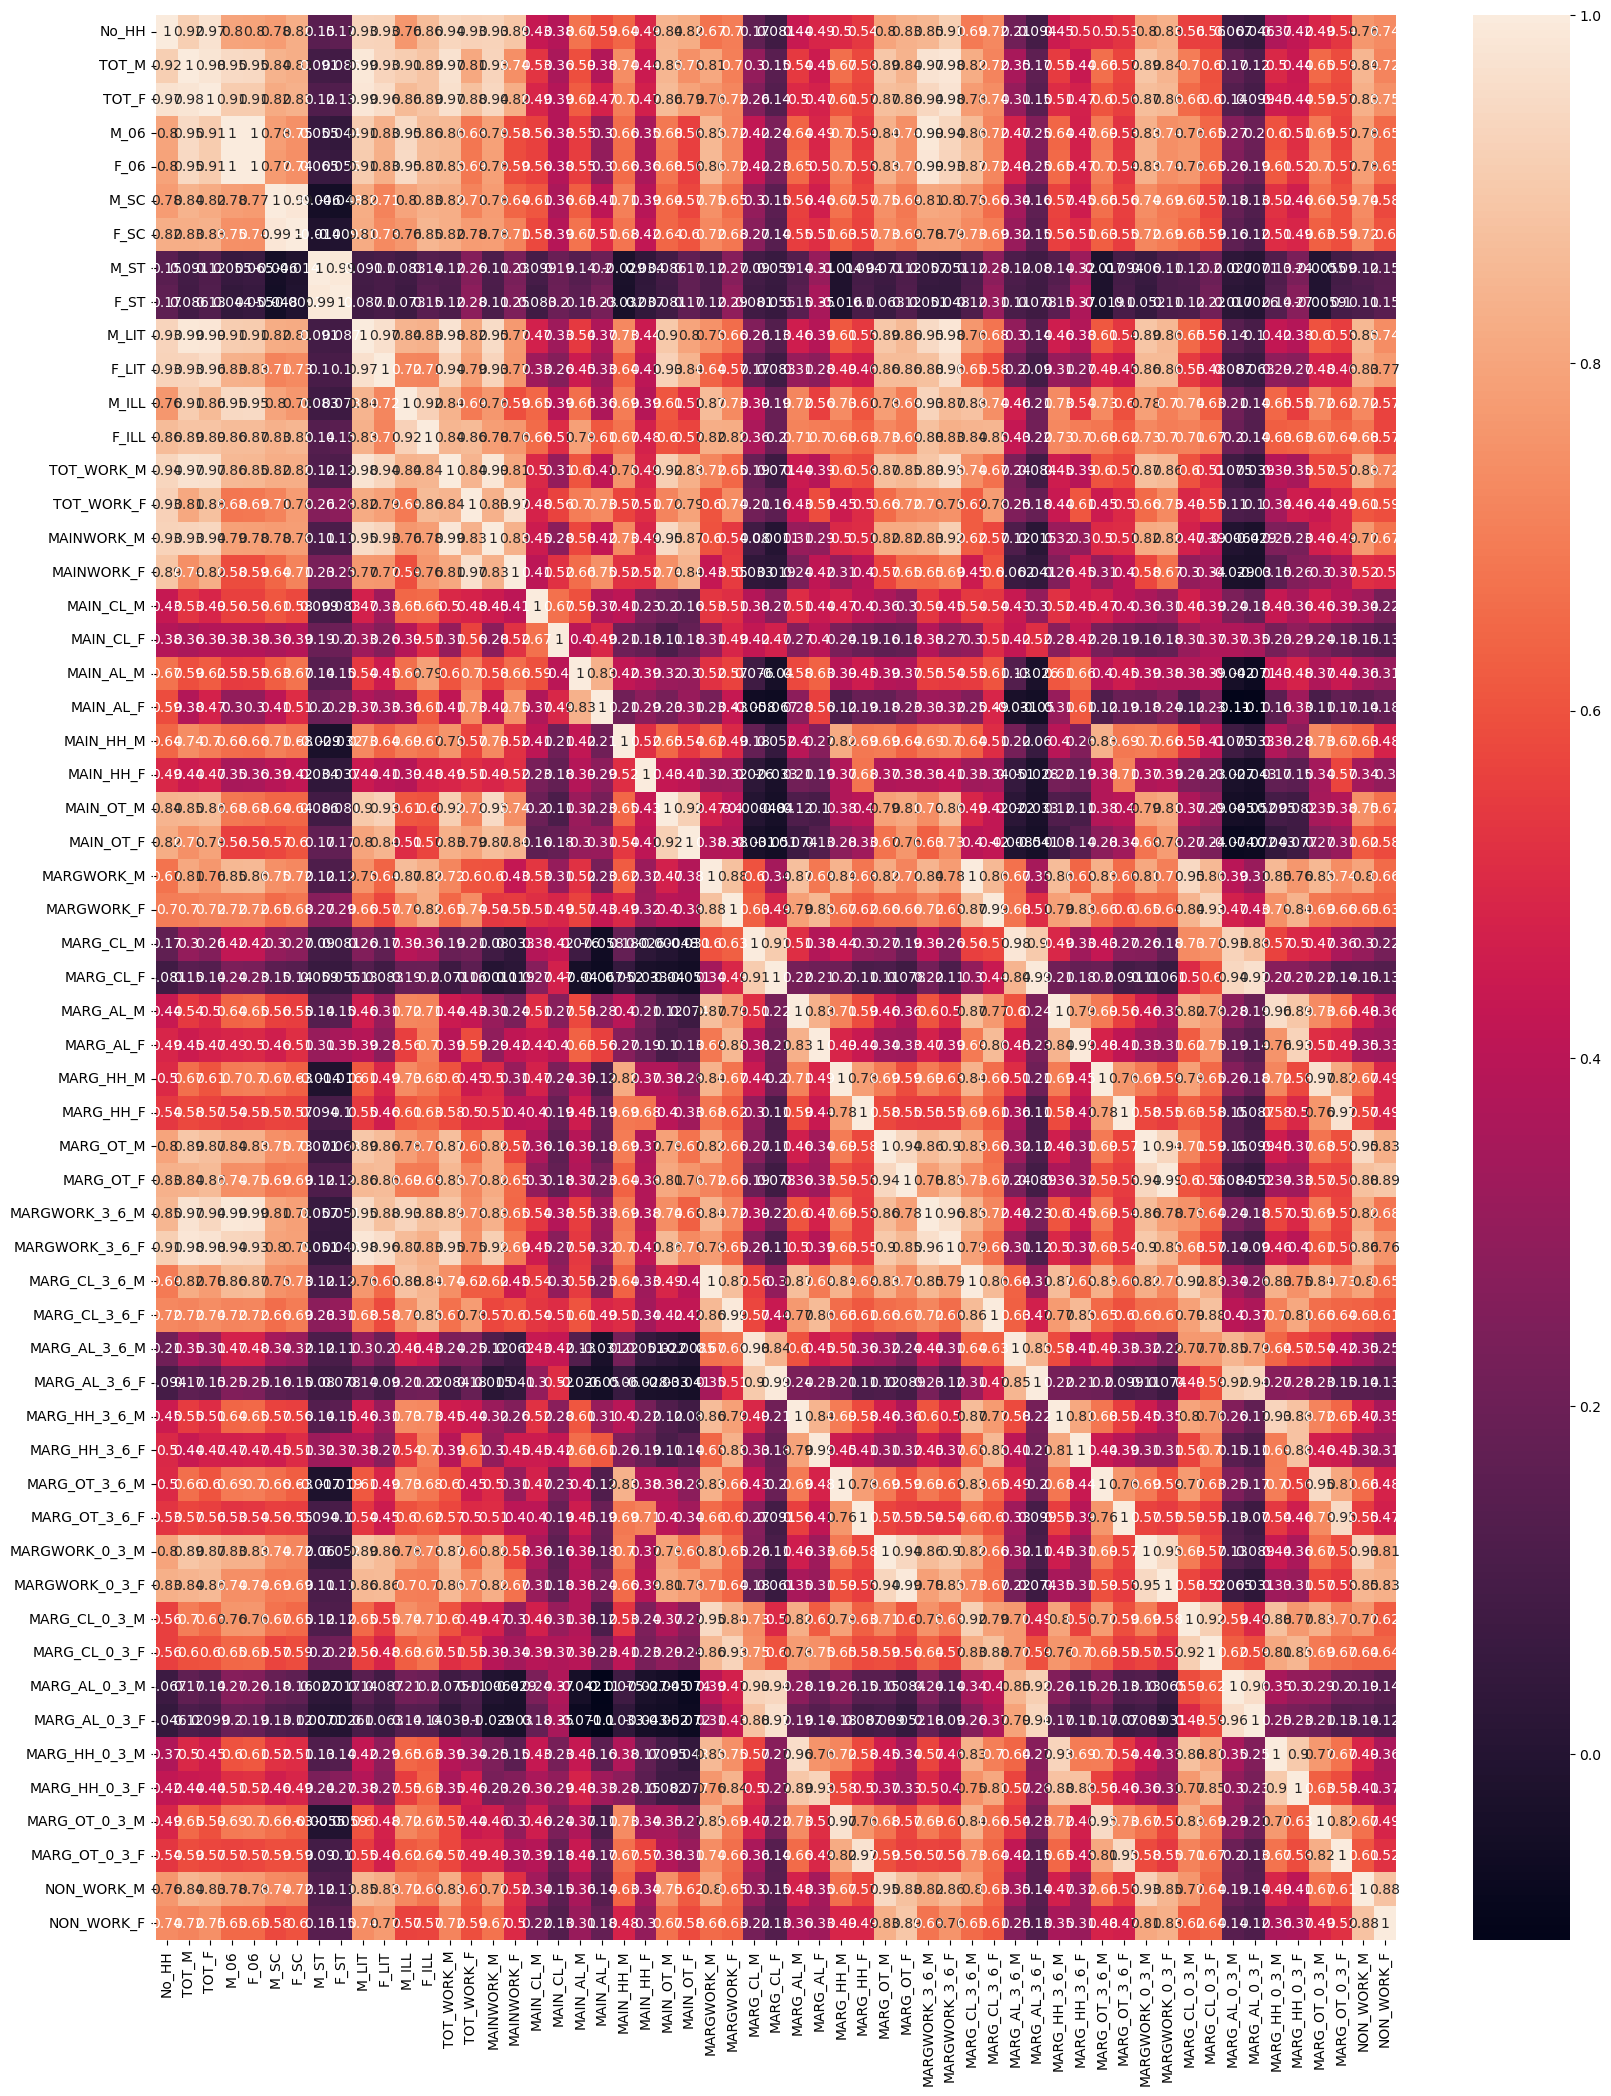

In [24]:
plt.figure(figsize = (20,25))
sns.heatmap(data_scaled.corr(),annot=True)

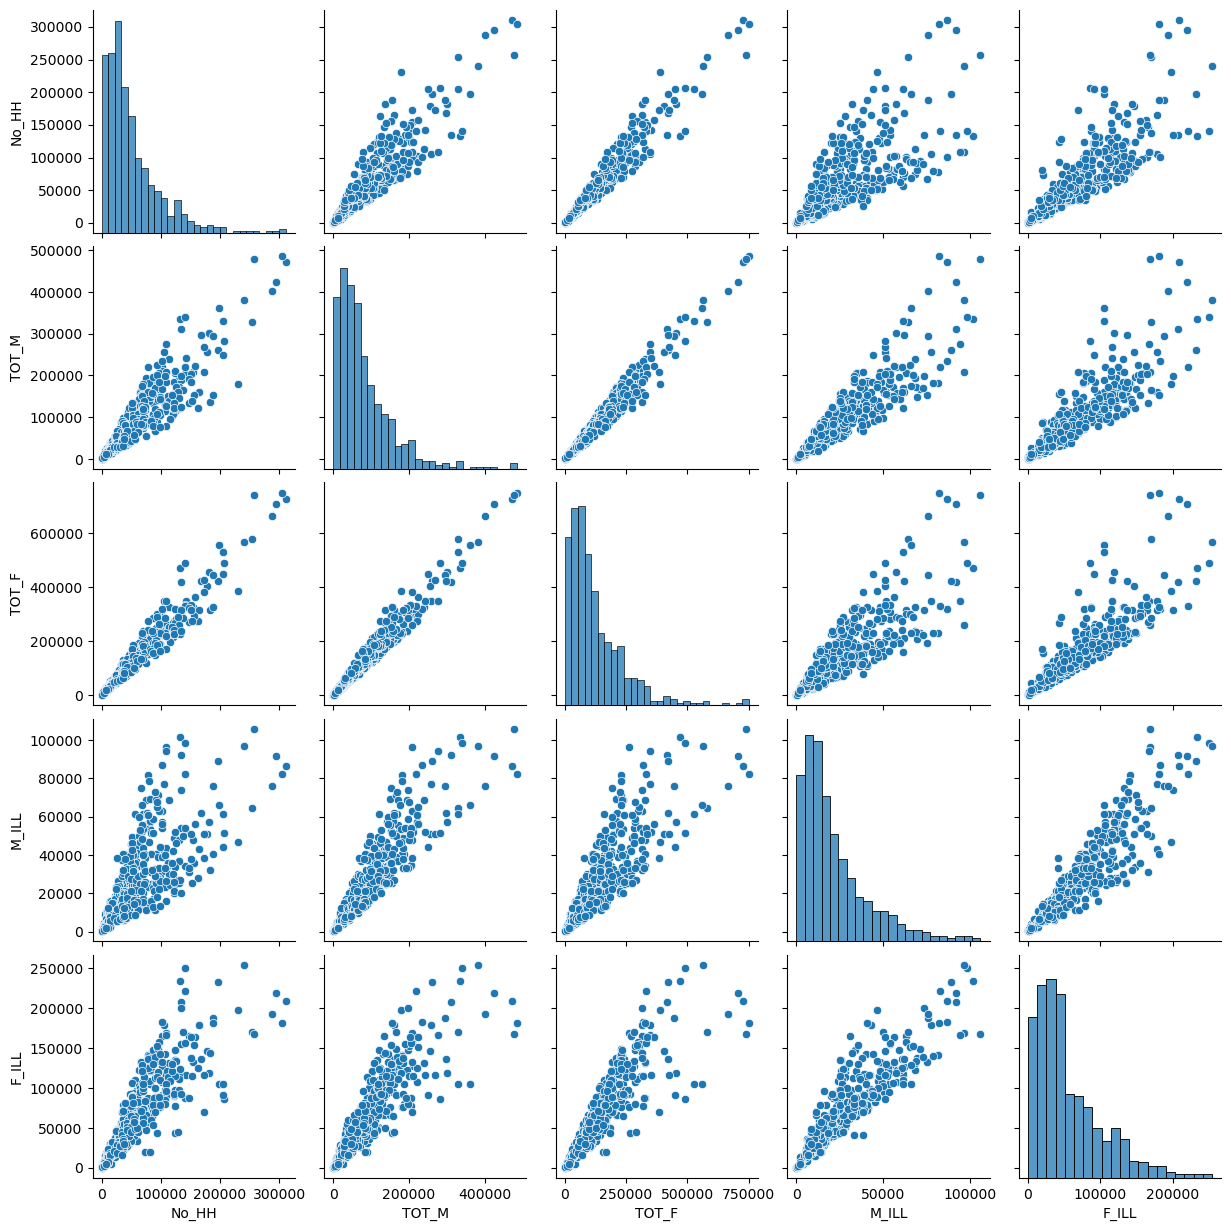

In [26]:
sns.pairplot(df[chosen_Five_cols]);

In [27]:
#Building covariance matrix
cov_matrix = np.cov(data_scaled.T,ddof=0)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.         0.91616988 0.97058979 ... 0.53685418 0.76238413 0.73569246]
 [0.91616988 1.         0.98264045 ... 0.58818023 0.84489622 0.71606121]
 [0.97058979 0.98264045 1.         ... 0.57185308 0.82765328 0.74658261]
 ...
 [0.53685418 0.58818023 0.57185308 ... 1.         0.6095693  0.52109686]
 [0.76238413 0.84489622 0.82765328 ... 0.6095693  1.         0.88090162]
 [0.73569246 0.71606121 0.74658261 ... 0.52109686 0.88090162 1.        ]]


In [28]:
#Building Eigen Vector and Eigen Value
eig_vals,eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)


Eigen Vectors 
 [[-1.56020579e-01+0.00000000e+00j  1.26346525e-01+0.00000000e+00j
  -2.69025037e-03+0.00000000e+00j ... -1.48607513e-14-2.31072816e-14j
  -1.48607513e-14+2.31072816e-14j  1.57448210e-14+0.00000000e+00j]
 [-1.67117635e-01+0.00000000e+00j  8.96765481e-02+0.00000000e+00j
   5.66976191e-02+0.00000000e+00j ...  3.83280868e-02+3.87038410e-02j
   3.83280868e-02-3.87038410e-02j -8.47177553e-02+0.00000000e+00j]
 [-1.65553179e-01+0.00000000e+00j  1.04912371e-01+0.00000000e+00j
   3.87494746e-02+0.00000000e+00j ... -1.31610835e-03+1.33108914e-01j
  -1.31610835e-03-1.33108914e-01j -3.08314752e-01+0.00000000e+00j]
 ...
 [-1.32192245e-01+0.00000000e+00j -5.08133220e-02+0.00000000e+00j
  -7.87198691e-02+0.00000000e+00j ... -4.67529022e-02-1.66555180e-02j
  -4.67529022e-02+1.66555180e-02j -2.86170227e-02+0.00000000e+00j]
 [-1.50375578e-01+0.00000000e+00j  6.53645529e-02+0.00000000e+00j
   1.11827318e-01+0.00000000e+00j ... -7.68675684e-02-4.10664084e-02j
  -7.68675684e-02+4.10664084e-0

In [29]:
print('The first eigen vector is:')
counter = 0
for i in range(0,len(eig_vecs[0])):
    counter = counter+1
    if(counter != (len(eig_vecs[0]))):
        print(eig_vecs[0,i],'*',d1.columns[i],"+")
    else:
        print(eig_vecs[0,i],'*',d1.columns[i])

The first eigen vector is:
(-0.15602057858567878+0j) * No_HH +
(0.1263465254511216+0j) * TOT_M +
(-0.0026902503678952723+0j) * TOT_F +
(-0.12529337156421833+0j) * M_06 +
(0.007022081300930453+0j) * F_06 +
(-0.004082812708623974+0j) * M_SC +
(0.11811039900370775+0j) * F_SC +
(-0.0572383078287205+0j) * M_ST +
(0.004264737531171972+0j) * F_ST +
(0.019985103304024063+0j) * M_LIT +
(-0.0105918766537777+0j) * F_LIT +
(-0.08619327075293742+0j) * M_ILL +
(-0.10417492564703407+0j) * F_ILL +
(0.028891545615619997+0j) * TOT_WORK_M +
(-0.05731964114312033+0j) * TOT_WORK_F +
(-0.02226295417666844+0j) * MAINWORK_M +
(-0.07927843396645752+0j) * MAINWORK_F +
(-0.13279831420623495+0j) * MAIN_CL_M +
(-0.09950616875208047+0j) * MAIN_CL_F +
(0.06153349699574795+0j) * MAIN_AL_M +
(-0.09141067674655383+0j) * MAIN_AL_F +
(0.39126381429710366+0j) * MAIN_HH_M +
(-0.3203348610061618+0j) * MAIN_HH_F +
(0.0020116374778675335+0j) * MAIN_OT_M +
(-0.09665622840546476+0j) * MAIN_OT_F +
(0.1357432256059013+0j) * MARGW

In [30]:
# using sklearn
from sklearn.decomposition import PCA

In [31]:
#First doing PCA for all columns with out aplying column reduction technique, to understand the column weightage
pca = PCA(n_components=57, random_state=123)
pca_transformed=pca.fit_transform(data_scaled)
pca_transformed


array([[-4.61726348e+00,  1.38115857e-01,  3.28544953e-01, ...,
        -6.06029097e-16,  6.08748032e-16,  2.96207163e-16],
       [-4.77166187e+00, -1.05865351e-01,  2.44448976e-01, ...,
         2.27457842e-16,  1.68484483e-16,  4.64305393e-16],
       [-5.96483558e+00, -2.94346892e-01,  3.67393453e-01, ...,
         4.15150177e-16, -4.48318483e-17,  8.23349729e-16],
       ...,
       [-6.29462500e+00, -6.38126644e-01,  1.07482817e-01, ...,
         3.45399264e-16,  1.72137876e-16, -4.11830008e-16],
       [-6.22319199e+00, -6.72319673e-01,  2.71325467e-01, ...,
        -1.01201345e-15, -4.66369483e-16,  1.55035951e-16],
       [-5.89623627e+00, -9.37169526e-01,  3.49218364e-01, ...,
        -6.19779140e-17,  3.72269309e-16, -5.80404880e-16]])

In [32]:
#eigen vectore
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.2077636 ,  0.24647657, ..., -0.07217993,
         0.00399206, -0.06929081],
       [ 0.        ,  0.2887035 , -0.20596721, ...,  0.04019745,
        -0.03192722,  0.00778048],
       [-0.        ,  0.18790022,  0.02642675, ..., -0.02597314,
        -0.13972835, -0.02147533]])

In [33]:
#Eigen values
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [34]:
#Impact of each variable on the target variable
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('The variance explained by each of eigen values in order is \n',var_exp)

The variance explained by each of eigen values in order is 
 [(55.726063245483374+0j), (13.784435398867211+0j), (7.275295475037659+0j), (6.4264177079027+0j), (3.865049438543729+0j), (3.3951692331221346+0j), (2.0602385461733603+0j), (1.3157638603636108+0j), (1.0808589417423922+0j), (0.9253954683322128+0j), (0.7529115396464433+0j), (0.6191016673019909+0j), (0.5187723837113811+0j), (0.49269485485278164+0j), (0.3365931194569842+0j), (0.23869298429982952+0j), (0.19861759344696125+0j), (0.18620674680204738+0j), (0.1704149548886651+0j), (0.14031763765002403+0j), (0.10091049360553578+0j), (0.07776531307693378+0j), (0.06637171898685905+0j), (0.05191177735689468+0j), (0.047434122226162855+0j), (0.04106873644998118+0j), (0.02541838143521263+0j), (0.01924221472767969+0j), (0.016316708282405164+0j), (0.014250334150863006+0j), (0.013824860517365483+0j), (0.008803792969803373+0j), (0.004550268241440755+0j), (0.0018705782641090176+0j), (0.0012499020832028923+0j), (1.933642355434923e-15+0j), (1.3408655

In [35]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained \n\n ", cum_var_exp)

Cumulative Variance Explained 

  [ 55.72606325+0.00000000e+00j  69.51049864+0.00000000e+00j
  76.78579412+0.00000000e+00j  83.21221183+0.00000000e+00j
  87.07726127+0.00000000e+00j  90.4724305 +0.00000000e+00j
  92.53266905+0.00000000e+00j  93.84843291+0.00000000e+00j
  94.92929185+0.00000000e+00j  95.85468732+0.00000000e+00j
  96.60759886+0.00000000e+00j  97.22670052+0.00000000e+00j
  97.74547291+0.00000000e+00j  98.23816776+0.00000000e+00j
  98.57476088+0.00000000e+00j  98.81345386+0.00000000e+00j
  99.01207146+0.00000000e+00j  99.19827821+0.00000000e+00j
  99.36869316+0.00000000e+00j  99.5090108 +0.00000000e+00j
  99.60992129+0.00000000e+00j  99.6876866 +0.00000000e+00j
  99.75405832+0.00000000e+00j  99.8059701 +0.00000000e+00j
  99.85340422+0.00000000e+00j  99.89447296+0.00000000e+00j
  99.91989134+0.00000000e+00j  99.93913356+0.00000000e+00j
  99.95545026+0.00000000e+00j  99.9697006 +0.00000000e+00j
  99.98352546+0.00000000e+00j  99.99232925+0.00000000e+00j
  99.99687952+0.000000

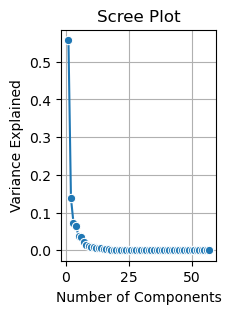

In [36]:
plt.figure(figsize = (2,3))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

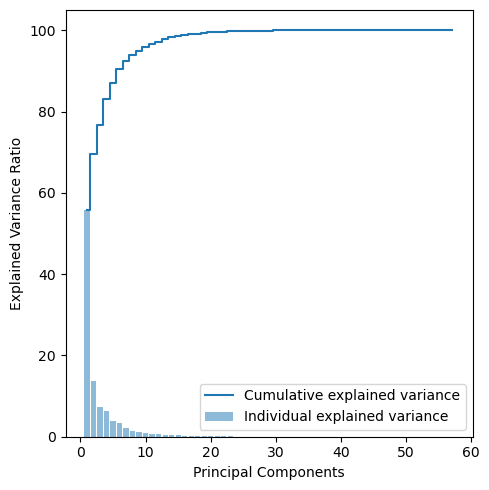

In [37]:
# Ploting 
plt.figure(figsize=(5 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [38]:
print('From the above plot, we can see that the number of components that we can probably take is 6.','\n'
      'We also see that if we take 6 components the total amount of variance explained is',cum_var_exp[5],'%')

From the above plot, we can see that the number of components that we can probably take is 6. 
We also see that if we take 6 components the total amount of variance explained is (90.47243049895681+0j) %


In [39]:
from sklearn.decomposition import PCA
pca_6Comps = PCA(n_components=6, random_state=123)
pca_6Comp_transformed = pca_6Comps.fit_transform(data_scaled)
pca_6Comp_transformed.transpose() 

array([[-4.61726348, -4.77166187, -5.96483558, ..., -6.294625  ,
        -6.22319199, -5.89623627],
       [ 0.13811585, -0.10586536, -0.29434689, ..., -0.63812665,
        -0.67231967, -0.93716953],
       [ 0.32854489,  0.24444895,  0.36739354, ...,  0.10748279,
         0.27132545,  0.34921832],
       [ 1.54369714,  1.96321495,  0.61954271, ...,  1.36818692,
         1.14349288,  1.114861  ],
       [ 0.35373623, -0.15388429,  0.47819913, ...,  0.15374528,
         0.06043998,  0.14910357],
       [-0.42094803,  0.41730835,  0.27658052, ...,  0.14114473,
        -0.11568247, -0.15454413]])

In [40]:
pca_6Comp_transformed

array([[-4.61726348,  0.13811585,  0.32854489,  1.54369714,  0.35373623,
        -0.42094803],
       [-4.77166187, -0.10586536,  0.24444895,  1.96321495, -0.15388429,
         0.41730835],
       [-5.96483558, -0.29434689,  0.36739354,  0.61954271,  0.47819913,
         0.27658052],
       ...,
       [-6.294625  , -0.63812665,  0.10748279,  1.36818692,  0.15374528,
         0.14114473],
       [-6.22319199, -0.67231967,  0.27132545,  1.14349288,  0.06043998,
        -0.11568247],
       [-5.89623627, -0.93716953,  0.34921832,  1.114861  ,  0.14910357,
        -0.15454413]])

In [41]:
pca_6Comps.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [42]:
df_comp = pd.DataFrame(pca_6Comps.components_.T,  columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6'], index = data_scaled.columns)

In [43]:
df_comp.T

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
PC1  0.156021  0.167118  0.165553  0.162193  0.162566  0.151358  0.151567   
PC2 -0.126347 -0.089677 -0.104912 -0.022095 -0.020271 -0.045111 -0.051924   
PC3 -0.002690  0.056698  0.038749  0.057788  0.050126  0.002569 -0.025101   
PC4 -0.125293 -0.019942 -0.070873  0.011917  0.014844  0.012485 -0.029893   
PC5 -0.007022 -0.033026 -0.012847 -0.050248 -0.043848 -0.173007 -0.159803   
PC6  0.004083 -0.073389 -0.043647 -0.157957 -0.154436 -0.064295 -0.040518   

         M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
PC1  0.027234  0.028183  0.161993  ...       0.150126       0.140157   
PC2  0.027679  0.030223 -0.115355  ...       0.150681       0.180690   
PC3 -0.123504 -0.139769  0.082168  ...       0.054892       0.023982   
PC4 -0.222247 -0.229754 -0.035163  ...       0.087433      -0.022290   
PC5  0.433163  0.438792 -0.009101  ...       0.081185       0.129936   
PC6  0.222591  0.225531 -0.055465  ...      -0.060715      -0.001727   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
PC1       0.052542       0.041786       0.121840       0.116011   
PC2       0.251328       0.240720       0.185277       0.180616   
PC3       0.268330       0.284956      -0.138628      -0.202198   
PC4      -0.104686      -0.135716       0.132544       0.004051   
PC5      -0.048849      -0.051895       0.062380       0.128308   
PC6       0.065409       0.083743      -0.124209      -0.105530   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
PC1       0.139869       0.132192    0.150376    0.131066  
PC2       0.084869       0.050813   -0.065365   -0.073847  
PC3      -0.022599      -0.078720    0.111827    0.102553  
PC4       0.230038       0.206201    0.084854    0.021124  
PC5      -0.036390       0.000165    0.162862    0.238292  
PC6       0.061228       0.295600   -0.052387   -0.024901  

[6 rows x 57 columns]

In [44]:
d = df_comp.T

In [47]:
print('The Equation of the First PC (PC1) is:')
counter = 0
for i in range(0,len(df_comp)):
    counter = counter+1
    if(counter != (len(df_comp))):
        print(d[d.columns[i]]['PC1'],'*',d.columns[i],"+")
    else:
        print(d[d.columns[i]]['PC1'],'*',d.columns[i])

The Equation of the First PC (PC1) is:
0.15602057858558882 * No_HH +
0.16711763488534773 * TOT_M +
0.16555317909057699 * TOT_F +
0.16219294820457567 * M_06 +
0.1625663956572639 * F_06 +
0.15135784909062241 * M_SC +
0.1515665001920241 * F_SC +
0.027234194570986105 * M_ST +
0.0281833150158602 * F_ST +
0.16199283733627962 * M_LIT +
0.1468726803012996 * F_LIT +
0.16174944463479707 * M_ILL +
0.1652481873683247 * F_ILL +
0.1598719881621171 * TOT_WORK_M +
0.14593580377247203 * TOT_WORK_F +
0.14620072976315188 * MAINWORK_M +
0.1239702835727301 * MAINWORK_F +
0.10312715882997166 * MAIN_CL_M +
0.07453978555514144 * MAIN_CL_F +
0.1133557121816289 * MAIN_AL_M +
0.07388215903143858 * MAIN_AL_F +
0.13157258402261918 * MAIN_HH_M +
0.08338263967427856 * MAIN_HH_F +
0.12352624192267483 * MAIN_OT_M +
0.1110212639132005 * MAIN_OT_F +
0.16461547856023115 * MARGWORK_M +
0.15539561810834474 * MARGWORK_F +
0.08238854140677226 * MARG_CL_M +
0.0491953956788778 * MARG_CL_F +
0.12859856294682148 * MARG_AL_M +
0.

In [48]:
print('The Equation of the Second PC (PC2) is:')
counter = 0
for i in range(0,len(df_comp)):
    counter = counter+1
    if(counter != (len(df_comp))):
        print(d[d.columns[i]]['PC2'],'*',d.columns[i],"+")
    else:
        print(d[d.columns[i]]['PC2'],'*',d.columns[i])

The Equation of the Second PC (PC2) is:
-0.12634652542610048 * No_HH +
-0.08967654811515613 * TOT_M +
-0.10491237104563468 * TOT_F +
-0.022094508639113 * M_06 +
-0.020270549574096266 * F_06 +
-0.0451109031624805 * M_SC +
-0.05192375426389083 * F_SC +
0.02767903870464334 * M_ST +
0.030222555012932598 * F_ST +
-0.11535476700227536 * M_LIT +
-0.15310948706603375 * F_LIT +
-0.006625373255240257 * M_ILL +
-0.00910743690317625 * F_ILL +
-0.1335292212228141 * TOT_WORK_M +
-0.08508696896950813 * TOT_WORK_F +
-0.1763680574530324 * MAINWORK_M +
-0.15141254381478597 * MAINWORK_F +
0.062414987193360076 * MAIN_CL_M +
0.08647672714408901 * MAIN_CL_F +
-0.031040349699669803 * MAIN_AL_M +
-0.05868802148111605 * MAIN_AL_F +
-0.07602106770174849 * MAIN_HH_M +
-0.0824766375539233 * MAIN_HH_F +
-0.21298425412196018 * MAIN_OT_M +
-0.21007116639889784 * MAIN_OT_F +
0.09299350131452609 * MARGWORK_M +
0.125269967088138 * MARGWORK_F +
0.2694497158408093 * MARG_CL_M +
0.2465468112128275 * MARG_CL_F +
0.16583075

In [49]:
print('The Equation of the Third PC (PC3) is:')
counter = 0
for i in range(0,len(df_comp)):
    counter = counter+1
    if(counter != (len(df_comp))):
        print(d[d.columns[i]]['PC3'],'*',d.columns[i],"+")
    else:
        print(d[d.columns[i]]['PC3'],'*',d.columns[i])

The Equation of the Third PC (PC3) is:
-0.002690248364293124 * No_HH +
0.05669761868277991 * TOT_M +
0.03874947560174136 * TOT_F +
0.05778815204719101 * M_06 +
0.05012556831621051 * F_06 +
0.0025689044250871637 * M_SC +
-0.02510087771410058 * F_SC +
-0.12350445314505792 * M_ST +
-0.1397688324493943 * F_ST +
0.08216766809262674 * M_LIT +
0.11709768583022667 * F_LIT +
-0.021855095893566816 * M_ILL +
-0.09306237782232252 * F_ILL +
0.04517636826510152 * TOT_WORK_M +
-0.05944954587363686 * TOT_WORK_F +
0.054294527956030986 * MAINWORK_M +
-0.055609096234063515 * MAINWORK_F +
-0.0673992946499843 * MAIN_CL_M +
-0.00923809162272389 * MAIN_CL_F +
-0.2479170557881921 * MAIN_AL_M +
-0.25193229429602493 * MAIN_AL_F +
0.026568940556273995 * MAIN_HH_M +
-0.06052329849244786 * MAIN_HH_F +
0.13737787971574253 * MAIN_OT_M +
0.09563398335470852 * MAIN_OT_F +
-0.008627825661240571 * MARGWORK_M +
-0.049369703896638396 * MARGWORK_F +
0.19875414809948933 * MARG_CL_M +
0.2687869057311273 * MARG_CL_F +
-0.1898

In [50]:
print('The Equation of the Fourth PC (PC4) is:')
counter = 0
for i in range(0,len(df_comp)):
    counter = counter+1
    if(counter != (len(df_comp))):
        print(d[d.columns[i]]['PC4'],'*',d.columns[i],"+")
    else:
        print(d[d.columns[i]]['PC4'],'*',d.columns[i])

The Equation of the Fourth PC (PC4) is:
-0.12529336723733792 * No_HH +
-0.019941570895805453 * TOT_M +
-0.07087261678656165 * TOT_F +
0.011917177135995938 * M_06 +
0.014844205349198336 * F_06 +
0.012485094896032046 * M_SC +
-0.02989250510171271 * F_SC +
-0.22224741157454794 * M_ST +
-0.22975441921101772 * F_ST +
-0.035162557007469286 * M_LIT +
-0.059559413391445354 * F_LIT +
0.025348333969857355 * M_ILL +
-0.07602335562841542 * F_ILL +
-0.04015441733969466 * TOT_WORK_M +
-0.22516003210283897 * TOT_WORK_F +
-0.06835075156276531 * MAINWORK_M +
-0.24663986402913046 * MAINWORK_F +
-0.089768670287235 * MAIN_CL_M +
-0.2889648996642063 * MAIN_CL_F +
-0.13608234363710017 * MAIN_AL_M +
-0.29004216220311607 * MAIN_AL_F +
0.15236634159420478 * MAIN_HH_M +
0.048950473750161615 * MAIN_HH_F +
-0.04028919049881713 * MAIN_OT_M +
-0.1203910633272209 * MAIN_OT_F +
0.09301825873032406 * MARGWORK_M +
-0.08870713526463388 * MARGWORK_F +
-0.0627608910953901 * MARG_CL_M +
-0.1684015974229152 * MARG_CL_F +
0.

In [51]:
print('The Equation of the Fifth PC (PC5) is:')
counter = 0
for i in range(0,len(df_comp)):
    counter = counter+1
    if(counter != (len(df_comp))):
        print(d[d.columns[i]]['PC5'],'*',d.columns[i],"+")
    else:
        print(d[d.columns[i]]['PC5'],'*',d.columns[i])

The Equation of the Fifth PC (PC5) is:
-0.00702205907697739 * No_HH +
-0.03302618402523961 * TOT_M +
-0.012846692229109238 * TOT_F +
-0.05024751503046615 * M_06 +
-0.04384796832788351 * F_06 +
-0.17300672815876844 * M_SC +
-0.15980339629404408 * F_SC +
0.43316342102125177 * M_ST +
0.4387919254838201 * F_ST +
-0.009101321091429502 * M_LIT +
0.05584374096363113 * F_LIT +
-0.0965797971736172 * M_ILL +
-0.11991054184457393 * F_ILL +
-0.019552889133928344 * TOT_WORK_M +
-0.04043737185198599 * TOT_WORK_F +
-0.0368019703667779 * MAINWORK_M +
-0.08283386408415834 * MAINWORK_F +
-0.28603909054639987 * MAIN_CL_M +
-0.24193636738899446 * MAIN_CL_F +
-0.2057234919753766 * MAIN_AL_M +
-0.17760476709178016 * MAIN_AL_F +
-0.13408883197409557 * MAIN_HH_M +
-0.13944087456663706 * MAIN_HH_F +
0.0646376996550404 * MAIN_OT_M +
0.08074275918150034 * MAIN_OT_F +
0.06024356988303664 * MARGWORK_M +
0.08920228772307294 * MARGWORK_F +
-0.022263217777718752 * MARG_CL_M +
-0.05920518577664651 * MARG_CL_F +
0.0194

In [52]:
print('The Equation of the Sixth PC (PC6) is:')
counter = 0
for i in range(0,len(df_comp)):
    counter = counter+1
    if(counter != (len(df_comp))):
        print(d[d.columns[i]]['PC6'],'*',d.columns[i],"+")
    else:
        print(d[d.columns[i]]['PC6'],'*',d.columns[i])

The Equation of the Sixth PC (PC6) is:
0.004082919723788884 * No_HH +
-0.07338927378446318 * TOT_M +
-0.04364681147256633 * TOT_F +
-0.1579567326176632 * M_06 +
-0.15443582953146867 * F_06 +
-0.06429508833487657 * M_SC +
-0.04051775287798287 * F_SC +
0.22259077312942543 * M_ST +
0.22553101374624604 * F_ST +
-0.05546466504838764 * M_LIT +
-0.04802052078221475 * F_LIT +
-0.11523435764359005 * M_ILL +
-0.028757365094861383 * F_ILL +
-0.0018007461569122928 * TOT_WORK_M +
0.10516227150261395 * TOT_WORK_F +
0.019282548227273585 * MAINWORK_M +
0.12383222434120833 * MAINWORK_F +
-0.006169712676277611 * MAIN_CL_M +
0.10295114238797602 * MAIN_CL_F +
-0.03106778289599801 * MAIN_AL_M +
0.019239742168212066 * MAIN_AL_F +
0.17446547511290145 * MAIN_HH_M +
0.4223093831429454 * MAIN_HH_F +
0.02347705358017215 * MAIN_OT_M +
0.08307914420829605 * MAIN_OT_F +
-0.09076150634083655 * MARGWORK_M +
0.01786768693548365 * MARGWORK_F +
0.031914646208638084 * MARG_CL_M +
0.09208566402204052 * MARG_CL_F +
-0.1416

In [53]:
df_FinalDimension = pd.DataFrame(pca_6Comp_transformed,  columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6'])

In [54]:
df_FinalDimension

PC1       PC2       PC3       PC4       PC5       PC6
0   -4.617263  0.138116  0.328545  1.543697  0.353736 -0.420948
1   -4.771662 -0.105865  0.244449  1.963215 -0.153884  0.417308
2   -5.964836 -0.294347  0.367394  0.619543  0.478199  0.276581
3   -6.280796 -0.500384  0.212701  1.074515  0.300799  0.051157
4   -4.478566  0.894154  1.078277  0.535557  0.804065  0.341678
..        ...       ...       ...       ...       ...       ...
635 -6.262088 -0.854414  0.242575  1.174113  0.063816 -0.159470
636 -5.767714 -0.900436  0.168051  1.102774  0.055179 -0.156458
637 -6.294625 -0.638127  0.107483  1.368187  0.153745  0.141145
638 -6.223192 -0.672320  0.271325  1.143493  0.060440 -0.115682
639 -5.896236 -0.937170  0.349218  1.114861  0.149104 -0.154544

[640 rows x 6 columns]

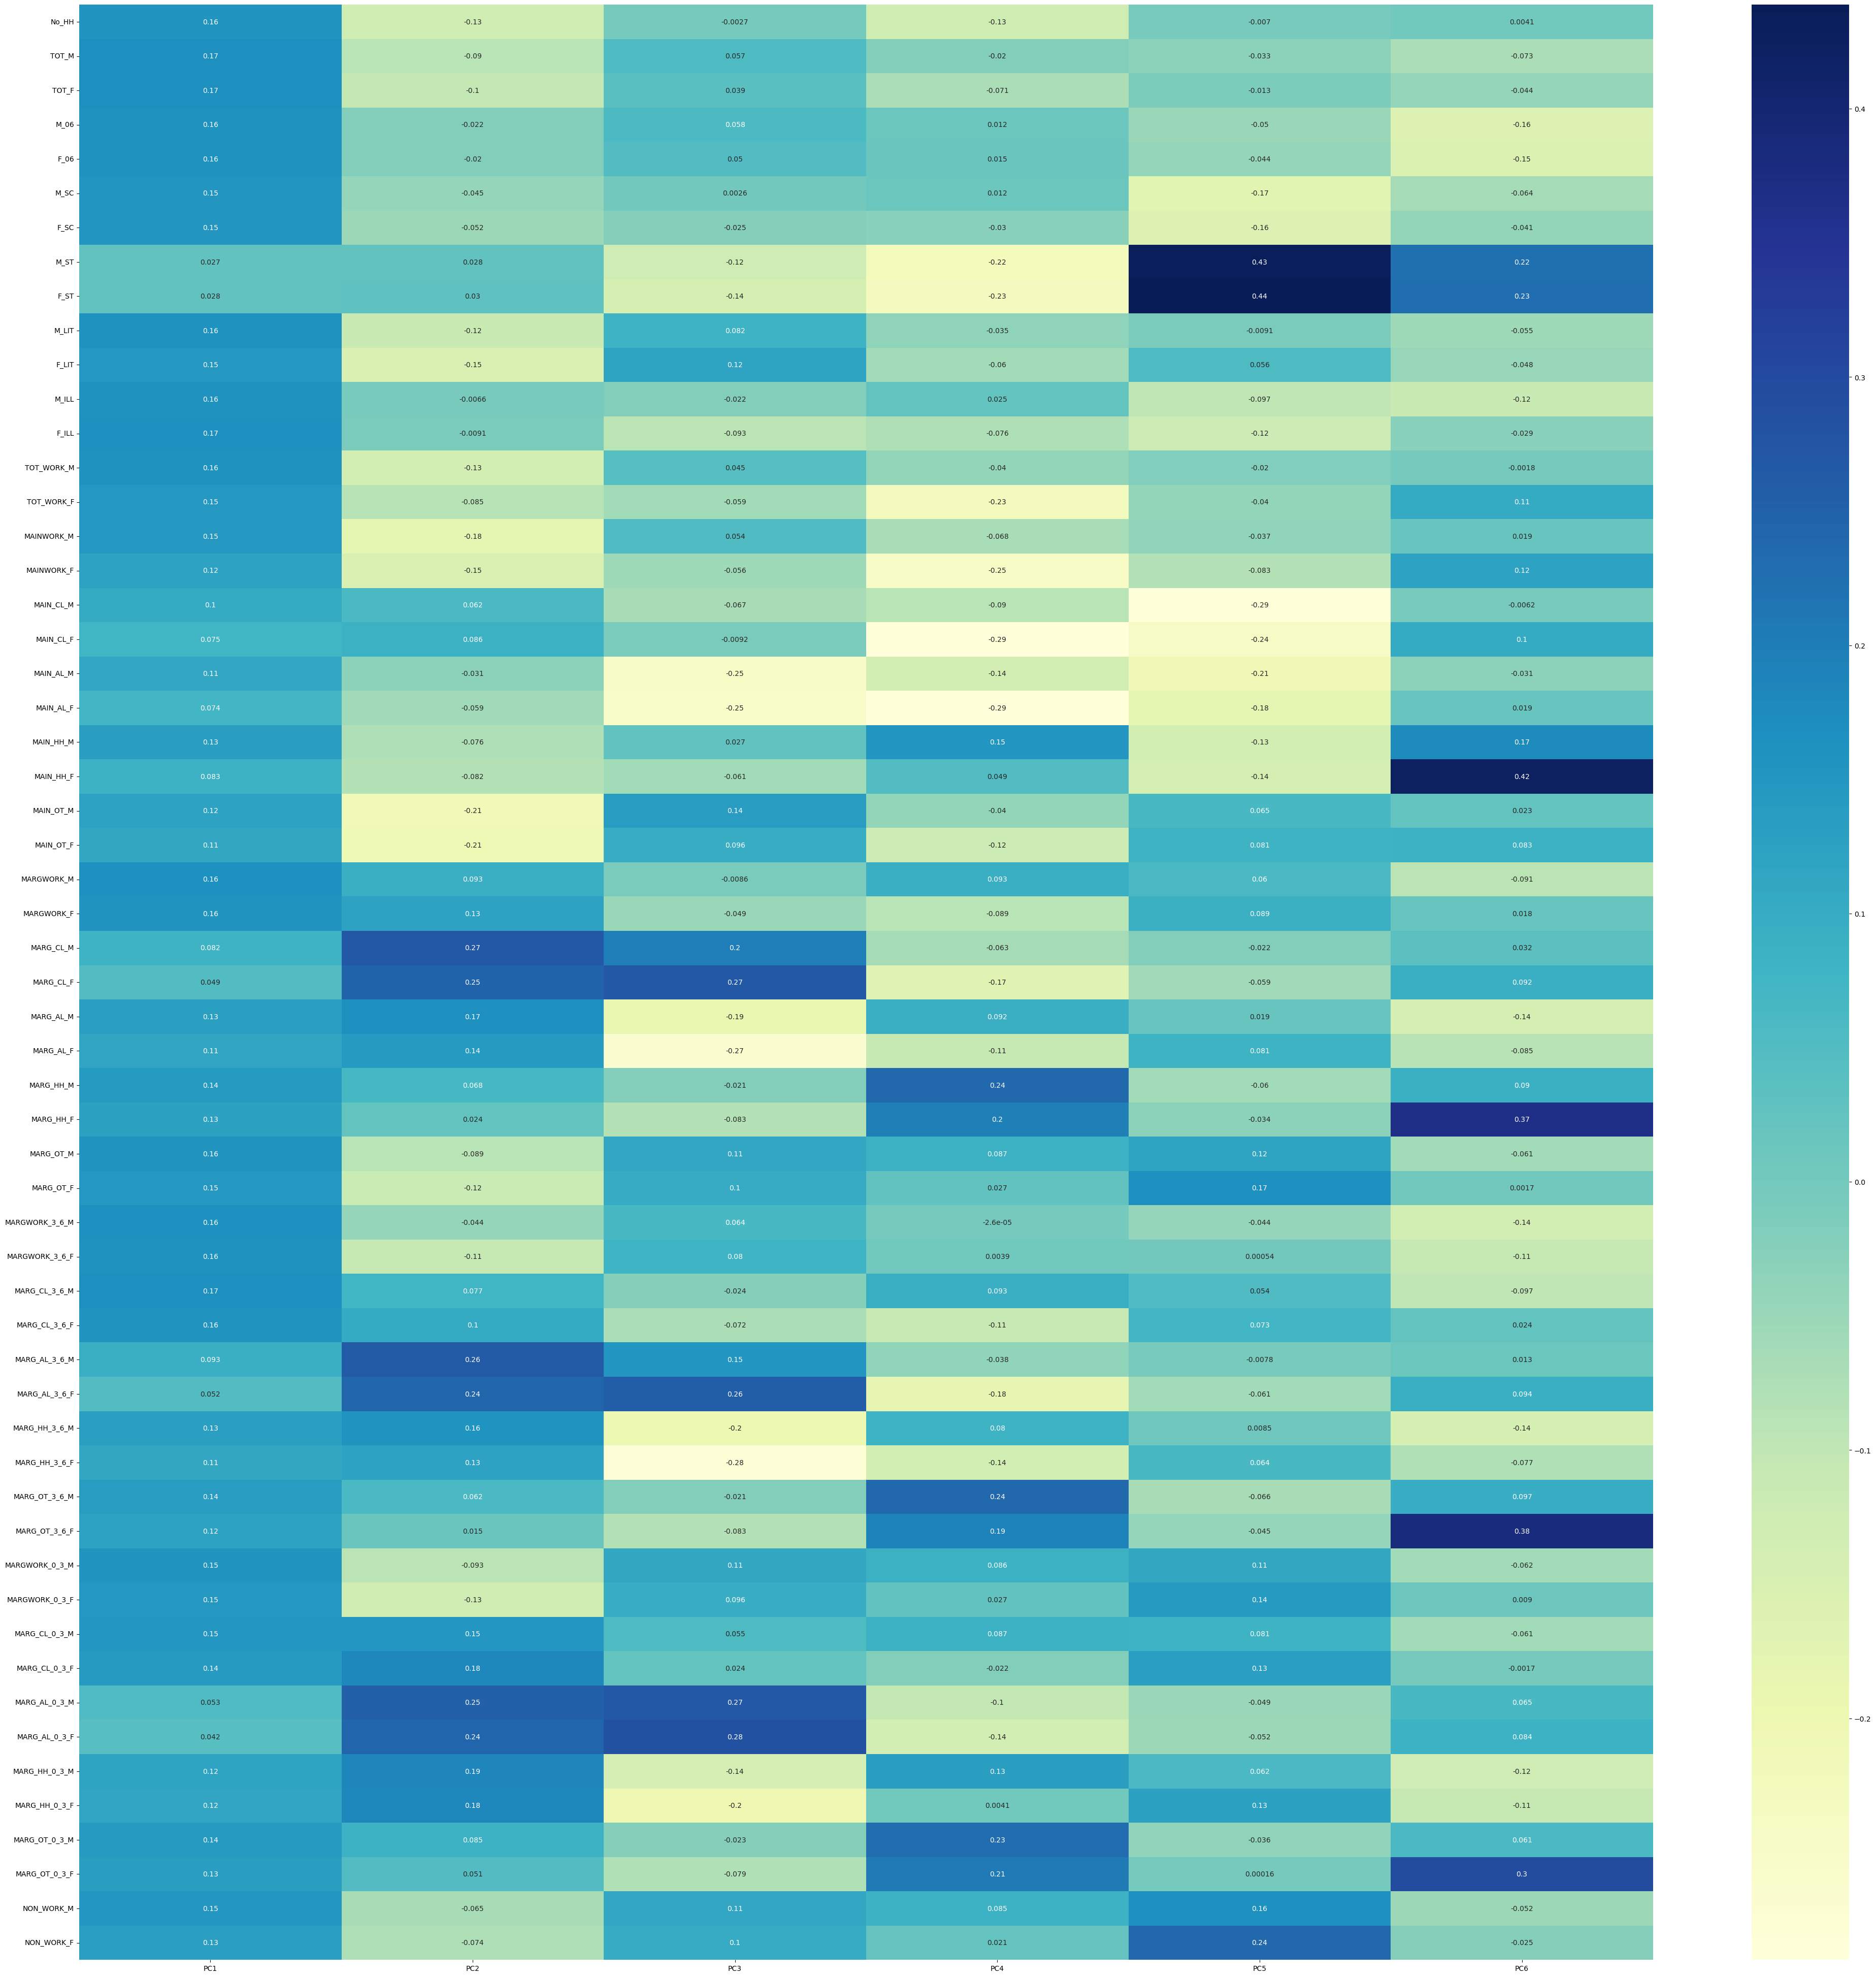

In [55]:
plt.figure(figsize=(50,50))
sns.heatmap(df_comp,annot=True,cmap="YlGnBu")
plt.show()

In [56]:
df_FinalDimension.to_csv('PCA_Result_India_Census_data.csv')

In [57]:
pca_6Comp_transformed

array([[-4.61726348,  0.13811585,  0.32854489,  1.54369714,  0.35373623,
        -0.42094803],
       [-4.77166187, -0.10586536,  0.24444895,  1.96321495, -0.15388429,
         0.41730835],
       [-5.96483558, -0.29434689,  0.36739354,  0.61954271,  0.47819913,
         0.27658052],
       ...,
       [-6.294625  , -0.63812665,  0.10748279,  1.36818692,  0.15374528,
         0.14114473],
       [-6.22319199, -0.67231967,  0.27132545,  1.14349288,  0.06043998,
        -0.11568247],
       [-5.89623627, -0.93716953,  0.34921832,  1.114861  ,  0.14910357,
        -0.15454413]])

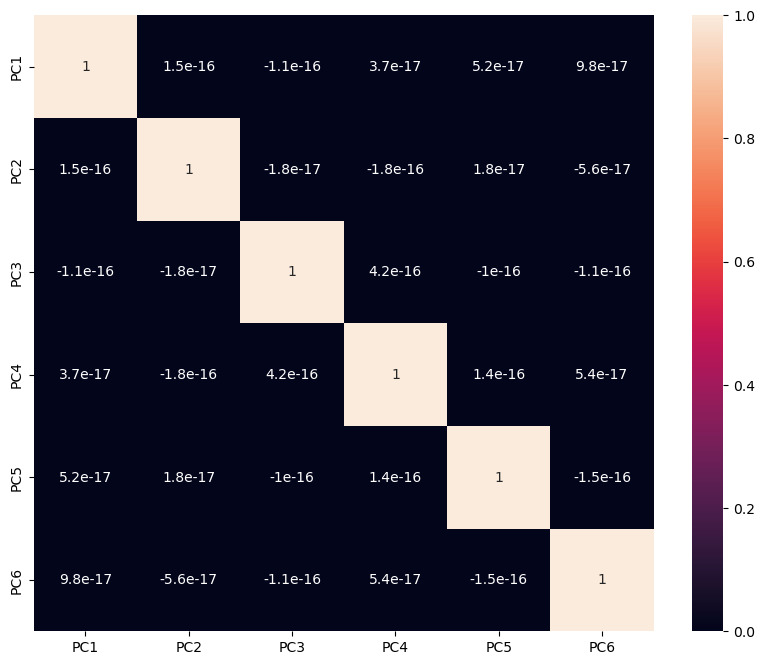

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(df_FinalDimension.corr(),annot=True)
plt.show()
#All columns have close to 0 correlation so the PCA is successful with no correlated variables.